<h1 style="color:darkred;">Import basic libraries</h1>

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("CAT.csv")
data_1 = data.copy()

In [3]:
data

,ID,Brand,VehicleModel,ManufacturingYear,Type,rating,color,Duty,fuel,CylinderCount,type of gear,capacity,Odometer,#airbags,price
0,2624,NaN,I have the fastest model ever.. yes you got it...,2017,WOOW Sedan,0.0,NaN,I had to pay a substantial $1249 levy on my ne...,Gas,4.0,R,2.5,75492 KM,1008,21012
1,14392,I love TOYOTA,NaN,NaN,Minivan3,5.0,Metallic,-,Gas,4.0 cyl,R,2.4,220000 KM,-96,11917
2,9822,hyundai,H1,2009,MINIVAN,0.0,Metallic,1185$,Dies,4.0,R,2.5,TOTAL 50653 km,4 count,22433
3,17123,opel,Corsa,NaN,Hatchback,5.0,Jet Black,-,NaN,4.0,auto,0,230000 KM,0,5645
4,11133,subaru,I own Outback.,2007,Hatchback,4.0,Sapphire Blue,-,Gas,4.0,NaN,2.5,131000 KM,4,10976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,7341,Chevrolet,ORLANDO,12years old,jeep,NaN,Gold,642$,Dies,0,gear,2,156802 kilo,4,16894
6996,5105,BMW,I own X5.,2114,WOOW Jeep,2.0,Pearl White,915$,Dies,6.0,AUTO,3,110715 km,0 bags,16621
6997,7223,toyota,NaN,12years old,sedan,0.0,NaN,781,Electric Hybrid,4.0,auto,2.5,314373 KM,12,392
6998,12184,toyota,Camry,2112,sedan,1.0,Metallic,781 pound,Gas,14.0,R,2.5,80000 km,12],17249


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 7000 non-null   int64  
 1   Brand              6294 non-null   object 
 2   VehicleModel       6303 non-null   object 
 3   ManufacturingYear  6305 non-null   object 
 4   Type               6315 non-null   object 
 5   rating             6310 non-null   float64
 6   color              4876 non-null   object 
 7   Duty               7000 non-null   object 
 8   fuel               6304 non-null   object 
 9   CylinderCount      7000 non-null   object 
 10  type of gear       6308 non-null   object 
 11  capacity           7000 non-null   object 
 12  Odometer           7000 non-null   object 
 13  #airbags           7000 non-null   object 
 14  price              7000 non-null   int64  
dtypes: float64(1), int64(2), object(12)
memory usage: 820.4+ KB


In [5]:
data.describe()

,ID,rating,price
count,7000.000000,6310.000000,7000.000000
mean,9022.128714,2.559588,14406.866429
std,5202.316292,1.905482,11747.617978
min,1.000000,-4.000000,3.000000
25%,4546.750000,1.000000,5018.000000
50%,9044.500000,2.000000,12544.000000
75%,13523.250000,4.000000,20071.000000
max,18013.000000,10.000000,49889.000000


In [6]:
data.describe(include = "O")

,Brand,VehicleModel,ManufacturingYear,Type,color,Duty,fuel,CylinderCount,type of gear,capacity,Odometer,#airbags
count,6294,6303,6305,6315,4876,7000,6304,7000,6308,7000,7000,7000
unique,185,1480,555,81,16,1173,7,28,7,87,4964,321
top,toyota,Prius,2012,sedan,Jet Black,-,Gas,4.0,auto,2,0 km,12
freq,497,113,429,1160,1239,2108,3272,2638,2870,1261,79,830


In [7]:
data.isna().sum()

ID                      0
Brand                 706
VehicleModel          697
ManufacturingYear     695
Type                  685
rating                690
color                2124
Duty                    0
fuel                  696
CylinderCount           0
type of gear          692
capacity                0
Odometer                0
#airbags                0
price                   0
dtype: int64

<div style="background-color: #f9f9f9; padding: 15px; border-radius: 5px; font-family: Arial, sans-serif;">
    <h3>notice that</h3>
    <ul>
        <li><strong>Data Standardization:</strong> Data is not in a standard form, so we need to extract the values we want first.</li>
        <li><strong>Handling Missing Values:</strong> Data has missing values that should be handled before proceeding.</li>
        <li><strong>ID column:</strong> The ID column is not important as a feature and should likely be dropped later.</li>
    </ul>
</div>

<h2 style="color:darkred;">Extraction</h2>

## Brand 

In [8]:
data['Brand'].unique()

array([nan, 'I love TOYOTA', 'hyundai', 'opel', 'subaru', 'VOLKSWAGEN',
       'FORD', 'Bmw', 'jaguar', 'I love HONDA', 'mercedes-benz',
       'I love FORD', 'honda', 'HYUNDAI', 'NISSAN', 'toyota',
       'volkswagen', 'lexus', 'ford', 'SSANGYONG', 'HONDA', 'Hyundai',
       'Toyota', 'BMW', 'MERCEDES-BENZ is the best',
       'I love MERCEDES-BENZ', 'SSANGYONG is the best', 'I love SUBARU',
       'ssangyong', 'TOYOTA is the best', 'nissan', 'kia', 'DAEWOO',
       'SUBARU is the best', 'TOYOTA', 'bmw', 'AUDI', 'CHEVROLET', 'jeep',
       'SUBARU', 'MERCEDES-BENZ', 'Mercedes-Benz', 'I love BMW', 'LEXUS',
       'I love HYUNDAI', 'NISSAN is the best', 'Opel', 'PORSCHE', 'MAZDA',
       'I love NISSAN', 'HYUNDAI is the best', 'chevrolet', 'mitsubishi',
       'I love KIA', 'Chevrolet', 'mazda', 'KIA', 'BMW is the best',
       'gmc', 'I love LEXUS', 'MITSUBISHI', 'I love MITSUBISHI', 'skoda',
       'Lexus', 'Volkswagen', 'SUZUKI', 'Ford', 'JEEP', 'OPEL', 'Honda',
       'I love VOLKSW

In [9]:
import re
def process_brand(data):
    
    def extract_brand(sentence):
        if not isinstance(sentence, str):
            return None
        
        combined_pattern = r"I love\s+(.*?)(?:\.|,|$)|^(.*?)(?:\s+is the best)" 
        match = re.search(combined_pattern, sentence)
        if match:
            return match.group(1) or match.group(2)
        
        return sentence
    data['Brand'] = (data['Brand'].apply(extract_brand).str.capitalize())
    
    return data

In [10]:
data = process_brand(data)

In [11]:
data['Brand'].unique()

array([None, 'Toyota', 'Hyundai', 'Opel', 'Subaru', 'Volkswagen', 'Ford',
       'Bmw', 'Jaguar', 'Honda', 'Mercedes-benz', 'Nissan', 'Lexus',
       'Ssangyong', 'Kia', 'Daewoo', 'Audi', 'Chevrolet', 'Jeep',
       'Porsche', 'Mazda', 'Mitsubishi', 'Gmc', 'Skoda', 'Suzuki', 'Fiat',
       'Peugeot', 'Dodge', 'Mini', 'Vaz', 'Gaz', 'Cadillac', 'Uaz',
       'Seat', 'Rover', 'Chrysler', 'Land rover', 'Infiniti', 'სხვა',
       'Alfa romeo', 'Renault', 'Greatwall', 'Buick', 'Volvo', 'Lincoln',
       'Isuzu', 'Scion', 'Rolls-royce', 'Citroen', 'Pontiac', 'Acura',
       'Daihatsu', 'Moskvich', 'Mercury', 'Maserati'], dtype=object)

## Vechiel model

In [12]:
data['VehicleModel'].value_counts()

VehicleModel
Prius                    113
Sonata                   104
Elantra                   96
FIT                       96
PRIUS                     89
                        ... 
Mazda 6 Grand Touring      1
I own Clio.                1
500 Abarth                 1
I own Quest.               1
I own X-type.              1
Name: count, Length: 1480, dtype: int64

In [13]:
small = data[data['VehicleModel'].str.len() > 10]

In [14]:
small['VehicleModel'].value_counts()

VehicleModel
I have the fastest model ever.. yes you got it right it's Sonata                68
I own Camry.                                                                    65
my model which is Prius is the best                                             61
my model which is Sonata is the best                                            58
I have the fastest model ever.. yes you got it right it's Prius                 58
                                                                                ..
I own Touareg.                                                                   1
my model which is S 500 is the best                                              1
my model which is XV LIMITED is the best                                         1
I have the fastest model ever.. yes you got it right it's CLK 200 Kompressor     1
I own X-type.                                                                    1
Name: count, Length: 881, dtype: int64

In [15]:
def process_vehicle_model(data):

    def extract_model(sentence):

        if not isinstance(sentence, str):
            return None
        
        model_pattern = r"\b(?:it's\s+)(\S.*)|\bis\s+(.*?)\s+is\b|\bI own\s+(.*)\b"
        match = re.search(model_pattern, sentence)
        if match:
            return match.group(1) or match.group(2) or match.group(3)
        return sentence

    data['VehicleModel'] = (data['VehicleModel'].apply(extract_model).astype(str).str.capitalize().replace(['None', 'nan'], np.nan))
    
    return data


In [16]:
data = process_vehicle_model(data)

In [17]:
data['VehicleModel'].value_counts()

VehicleModel
Prius                 378
Sonata                359
Camry                 313
Elantra               312
Fit                   164
                     ... 
Omega c                 1
Tc                      1
Captur qm3 samsung      1
Combo 1700              1
X-type                  1
Name: count, Length: 770, dtype: int64

## Type

In [18]:
data['Type'].unique()

array(['WOOW Sedan', 'Minivan3', 'MINIVAN', 'Hatchback', 'sedan', 'SEDAN',
       'Pickup3', 'jeep', 'Minivan', 'HATCHBACK', 'minivan', 'hatchback',
       'JEEP', 'microbus', nan, 'Jeep1', 'Sedan0', 'Coupe', 'Sedan3',
       'Hatchback3', 'Sedan', 'Jeep0', 'WOOW Hatchback', 'WOOW Jeep',
       'Hatchback1', 'WOOW Coupe', 'UNIVERSAL', 'Hatchback2', 'Jeep2',
       'Hatchback4', 'Sedan4', 'Sedan1', 'Jeep', 'WOOW Minivan', 'Jeep4',
       'Hatchback0', 'Goods Wagon', 'universal', 'WOOW Goods wagon',
       'MICROBUS', 'Minivan0', 'Coupe1', 'goods wagon', 'pickup', 'Jeep3',
       'Sedan2', 'coupe', 'Pickup1', 'COUPE', 'CABRIOLET', 'Universal0',
       'Microbus', 'WOOW Universal', 'Goods wagon1', 'WOOW Microbus',
       'Minivan2', 'GOODS WAGON', 'cabriolet', 'Goods wagon0', 'Coupe4',
       'Universal', 'Goods wagon2', 'Microbus4', 'Coupe3', 'Goods wagon4',
       'Limousine', 'PICKUP', 'Microbus0', 'Coupe0', 'Goods wagon3',
       'Universal3', 'Minivan1', 'Microbus3', 'Microbus1', 'Un

In [19]:
def process_type(data):
    def extract_type(sentence):
        if not isinstance(sentence, str):
            return None
        
        woow_pattern = r"\bWOOW\s+([a-zA-Z\s]+)"
        match = re.search(woow_pattern, sentence, re.IGNORECASE)
        if match:
            return match.group(1).strip().title() 
        
        type_pattern = r"^([a-zA-Z\s]+?)(?:\d+)?$"
        match = re.search(type_pattern, sentence, re.IGNORECASE)
        if match:
            return match.group(1).strip().title()  
   
        return None

    data['Type'] = data['Type'].apply(extract_type)
    return data

In [20]:
data = process_type(data)

In [21]:
data['Type'].value_counts()

Type
Sedan          2907
Jeep           1706
Hatchback       989
Minivan         240
Coupe           153
Universal       107
Microbus        101
Goods Wagon      87
Pickup           14
Cabriolet         9
Limousine         2
Name: count, dtype: int64

## Year 

In [22]:
data['ManufacturingYear'].unique()

array(['2017', nan, '2009', '2007', '3010', '1999', '2012', '2011',
       '2014', '2015', '2006', '2105', '2013,', '2010', '2017{',
       '1-1-2003', '2016', '1998', '2018', '2008', '2015+', '2012"',
       '2013', '2111', '1-1-2020', '2005', '2017*', '2004', '2016.',
       '2015#', '1910', '2017&', '1914', '1-1-2013', '3009', '2009&',
       '2018}', '14years old', '1-1-2014', '2001', '2015`', '2112',
       '1997', '2014@', '1917', '2014+', '2013*', '1-1-2011', '1-1-2008',
       '2012,', '2003', '1-1-2007', '15years old', '1916', '1-1-2012',
       '1912', '2010~', '2020', '2002>', '2110', '2005>', '2115',
       '1-1-2005', '2009%', '2019', '10years old', '1-1-2002', '2015@',
       '3013', '1907', '2010*', '2000', '1996_', '12years old', '2011;',
       '2017_', '13years old', '3014', '2017(', '2011,', '11years old',
       '7years old', '1-1-2010', '3004', '1996|', '1913', '2014|',
       '1-1-2016', '2016[', '1900', "2009'", '1902', '2117', '1-1-2009',
       '8years old', '2

In [23]:
def process_manufacturing_year(data):
    def extract_year(sentence):
        char_pattern = r"\b\d{4}\b"
        match = re.search(char_pattern, sentence)
        if match:
            return int(match.group(0))
        
        old_pattern = r'(\d+)\s*years\s*old'
        match = re.search(old_pattern, sentence)
        if match:
            age = int(match.group(1))
            return 2024 - age
        
        return None

    data['ManufacturingYear'] = data['ManufacturingYear'].astype(str)
    data['ManufacturingYear'] = data['ManufacturingYear'].apply(extract_year)
    return data

In [24]:
data = process_manufacturing_year(data)

In [25]:
data['ManufacturingYear'].value_counts()

ManufacturingYear
2012.0    646
2014.0    629
2013.0    576
2011.0    496
2010.0    467
         ... 
1982.0      1
1893.0      1
2101.0      1
2096.0      1
1895.0      1
Name: count, Length: 117, dtype: int64

## Rating 

In [26]:
data['rating'].unique()

array([ 0.,  5.,  4., nan,  2.,  6.,  3.,  8.,  1.,  7., -1., -2., -3.,
        9., 10., -4.])

#### convert the negative values to positive as i see negative is invalid 

In [27]:
def process_rating(data):
    data['rating'] = pd.to_numeric(data['rating'], errors='coerce')
    data['rating'] = data['rating'].abs().astype('Int64')
    return data

In [28]:
data = process_rating(data)

In [29]:
data['rating'].unique()

<IntegerArray>
[0, 5, 4, <NA>, 2, 6, 3, 8, 1, 7, 9, 10]
Length: 12, dtype: Int64

## Duty 

In [30]:
def process_duty(data):
    def extract_duty(sentence):
        if not isinstance(sentence, str) or sentence.strip() in ['-', '', 'nan']:
            return 0 
        
        pattern = r"\d+"
        match = re.search(pattern, sentence)
        
        if match:
            return int(match.group(0))  
        
        return 0

    data['Duty'] = data['Duty'].astype(str).apply(extract_duty)
    return data

In [31]:
data = process_duty(data)

In [32]:
data['Duty'].value_counts().head(50)

Duty
0       2578
765      147
640      132
891      121
639      106
707       90
781       90
642       86
779       83
777       78
1017      74
585       70
836       66
586       63
1172      60
831       59
1399      59
761       58
730       56
1091      55
531       54
645       49
919       46
394       45
583       45
1058      43
934       42
584       41
751       39
753       37
862       37
528       36
1055      36
1018      35
629       34
1249      33
1750      33
503       33
530       32
1053      31
382       30
502       30
697       30
1079      29
308       29
915       27
749       25
1024      24
687       24
1811      24
Name: count, dtype: int64

## Odometer

In [33]:
data['Odometer'].value_counts()

Odometer
0 km                79
0  kilo             52
0 KM                48
0                   30
TOTAL 0 km          30
                    ..
88900                1
16500                1
224643 KM            1
64274  kilometer     1
131627               1
Name: count, Length: 4964, dtype: int64

In [34]:
def process_odometer(data):
    def extract_odometer(sentence):
        pattern = r"\d+" 
        match = re.search(pattern, sentence)

        if match:
            return match.group(0)
        return None

    data['Odometer'] = data['Odometer'].apply(extract_odometer)
    data['Odometer'] = pd.to_numeric(data['Odometer'], errors='coerce')  
    return data

In [35]:
data = process_odometer(data)

In [36]:
data['Odometer'].value_counts()

Odometer
0         257
200000     63
150000     63
160000     42
100000     42
         ... 
326612      1
41203       1
181727      1
224062      1
131627      1
Name: count, Length: 3511, dtype: int64

## Fuel 

In [37]:
data['fuel'].unique()

array(['Gas', 'Dies', nan, 'Electric Hybrid', 'other', 'Natural Gas',
       'hyb', 'others'], dtype=object)

In [38]:
def process_fuel(data):
    data['fuel'] = data['fuel'].replace(['others'], 'other')
    data['fuel'] = data['fuel'].replace(['Electric Hybrid', 'hyb'], 'Hybrid')
    return data

In [39]:
data = process_fuel(data)

In [40]:
data['fuel'].unique()

array(['Gas', 'Dies', nan, 'Hybrid', 'other', 'Natural Gas'], dtype=object)

## CylinderCount

#### if the cylinder count is zero I return None

In [41]:
import pandas as pd
import numpy as np
import re

def process_cylinder(data):
    def extract_Cylinder(sentence):
        if sentence == '0':
            return None 
        pattern = r"\d+" 
        match = re.search(pattern, sentence)

        if match:
            return int(match.group(0))
        return None 

    data['CylinderCount'] = data['CylinderCount'].apply(extract_Cylinder).astype('Int64')
    return data

In [42]:
data = process_cylinder(data)

In [43]:
data['CylinderCount'].unique()

<IntegerArray>
[4, 8, 6, 14, <NA>, 5, 16, 18, 3, 15, 10, 11, 2, 9, 1, 12, 13, 7]
Length: 18, dtype: Int64

In [44]:
data['CylinderCount'].value_counts()

CylinderCount
4     4269
6      971
14     525
8      255
16     109
5       48
3       28
18      26
2       13
12      12
1       10
15       6
10       4
11       2
7        2
9        1
13       1
Name: count, dtype: Int64

## Capacity 

In [45]:
data['capacity'].unique()

array(['2.5', '2.4', '0', '2', '5', '3', '1.3', '1.5', '1.6', '1.8',
       '3.5', '2.7 Turbo', '1.8 Turbo', '2.7', '2.5 Turbo', '3.3', '1.7',
       '2.2', '2.2 Turbo', '4', '1.4', '4.8', '1.2', '2.3', '1.6 Turbo',
       '4.7', '2.0 Turbo', '2.8 Turbo', '3.2', '5.5', '6.2', '4.6', '3.7',
       '1', '3.0 Turbo', '1.9 Turbo', '2.4 Turbo', '5.0 Turbo', '3.6',
       '4.4', '1.4 Turbo', '2.6', '3.2 Turbo', '0.6 Turbo', '1.5 Turbo',
       '6.3', '3.8', '5.7', '1.9', '4.5', '5.9', '0.3', '5.5 Turbo',
       '4.5 Turbo', '4.2', '3.5 Turbo', '0.4', '0.1', '0.2', '0.8',
       '4.4 Turbo', '2.3 Turbo', '4.7 Turbo', '2.9 Turbo', '1.7 Turbo',
       '6.7', '2.1 Turbo', '2.8', '2.9', '0.7', '2.1', '1.3 Turbo', '5.4',
       '5.4 Turbo', '3.4', '5.3', '4.3', '0.9', '0.8 Turbo', '0.6',
       '3.6 Turbo', '1.0 Turbo', '5.6', '5.2', '1.1', '4.8 Turbo', '0.5'],
      dtype=object)

In [46]:
data['capacity'].value_counts()

capacity
2            1261
2.5           765
0             714
1.8           609
1.6           503
             ... 
0.8 Turbo       1
6.7             1
0.3             1
5.4 Turbo       1
0.5             1
Name: count, Length: 87, dtype: int64

#### knowing that turbo is an important indicator to the price of the car i made an additional column for turbo labeled 1 or 0

In [47]:
def process_capacity_and_turbo(data):
    data['turbo'] = data['capacity'].apply(lambda x: 1 if "Turbo" in str(x) else 0)
    data['capacity'] = data['capacity'].str.replace(" Turbo", "", regex=False).astype(float)
    return data

In [48]:
data = process_capacity_and_turbo(data)

In [49]:
data['capacity']

0       2.5
1       2.4
2       2.5
3       0.0
4       2.5
       ... 
6995    2.0
6996    3.0
6997    2.5
6998    2.5
6999    0.0
Name: capacity, Length: 7000, dtype: float64

In [50]:
data['turbo']

0       0
1       0
2       0
3       0
4       0
       ..
6995    0
6996    0
6997    0
6998    0
6999    0
Name: turbo, Length: 7000, dtype: int64

## Type of gear 

In [51]:
data['type of gear'].unique()

array(['R', 'auto', nan, 'manual', 'others', 'MANUAL', 'AUTO', 'gear'],
      dtype=object)

In [52]:
def process_gear_type(data):
    data['type of gear'] = data['type of gear'].str.capitalize()
    return data

In [53]:
data = process_gear_type(data)

In [54]:
data['type of gear'].unique()

array(['R', 'Auto', nan, 'Manual', 'Others', 'Gear'], dtype=object)

## Air bags 

In [55]:
data = data.rename(columns={'#airbags': 'Air_bag'})

In [56]:
data['Air_bag'].unique()

array(['1008', '-96', '4 count', '0  ', '4  ', '12', '6 count', '8', '4',
       '12,', '6~', '106', '6', '2', '8 bags', '12<', '0',
       'ONLY 10 AIRBAG', '12 count', 'ONLY 4 AIRBAG', '1012', '10',
       '12 bags', '4 bags', 'ONLY 8 AIRBAG', '5', '8 count',
       'ONLY 0 AIRBAG', '12/', 'ONLY 6 AIRBAG', '12)', '-100', '8=',
       'ONLY 12 AIRBAG', '12  ', '108', '4<', '-94', '12|', '6 bags',
       '2 count', '12`', '4]', '8$', '-88', '10 count', '6  ', '12>',
       '112', '6(', '11', '110', '4@', '4&', '0 count', '4{', '4#', '104',
       '1005', '12~', '4!', '2  ', '5 count', '16 bags', '6?', '1', '-92',
       '100', '1004', '9', '14', '4$', '4,', '12!', '8  ', '-90', '12&',
       '6/', '1 count', 'ONLY 2 AIRBAG', '0~', "8'", '2 bags', '4[',
       '10 bags', '8&', '0 bags', '12#', "4'", '2<', '0#', "0'", '13',
       '2(', '2*', '4"', '4(', '0-', '8:', '2,', '8@', 'ONLY 5 AIRBAG',
       '-98', '4_', '0"', '0[', '10  ', '7', '12}', '1002', '6"', '6_',
       '6:', '4;', '10

#### if number of bags > 14 return None 

In [57]:
def process_bag(data):
    def extract_bag(sentence):
        pattern = r"\d+" 
        match = re.search(pattern, sentence)

        if match:
            number = match.group(0)
            if int(number) <= 14:
                return int(number)
            else:
                return None 
        
        return None

    data['Air_bag'] = data['Air_bag'].astype(str).apply(extract_bag)
    return data

In [58]:
data = process_bag(data)

In [59]:
data['Air_bag'].unique()

array([nan,  4.,  0., 12.,  6.,  8.,  2., 10.,  5., 11.,  1.,  9., 14.,
       13.,  7.,  3.])

In [60]:
data['Air_bag'].value_counts()

Air_bag
4.0     1870
12.0    1852
0.0      774
8.0      545
6.0      455
2.0      357
10.0     270
5.0       34
1.0       33
7.0       30
9.0       19
11.0      16
3.0       11
14.0       7
13.0       2
Name: count, dtype: int64

## ALL in one function  to process the new data or use in a pipeline 

In [61]:
def extract_data(data):
    processing_functions = {
        'VehicleModel':process_vehicle_model ,
        'Brand': process_brand,
        'Type':process_type,
        'ManufacturingYear':process_manufacturing_year ,
        'fuel': process_fuel,
        'Duty': process_duty,
        'Odometer':process_odometer ,
        'rating': process_rating,
        'CylinderCount': process_cylinder,
        'capacity': process_capacity_and_turbo,
        'type of gear': process_gear_type,
        'Air_bag': process_bag
    }

    for column, func in processing_functions.items():
        if column in data.columns:
            data = func(data)

    return data

In [62]:
data_1 = data_1.rename(columns={'#airbags': 'Air_bag'})
data_1 = extract_data(data_1)

<h1 style="color:darkred;">fill missing values</h1>

In [63]:
data.isna().sum()

ID                      0
Brand                 706
VehicleModel          697
ManufacturingYear     717
Type                  685
rating                690
color                2124
Duty                    0
fuel                  696
CylinderCount         718
type of gear          692
capacity                0
Odometer                0
Air_bag               725
price                   0
turbo                   0
dtype: int64

### drop the row if both of  the brand and model and year are missing 

In [64]:
def drop_important_missing(data):
    row_drop = data[
        (data['Brand'].isna() & data['VehicleModel'].isna() & data['ManufacturingYear'].isna()) |
        (data['Brand'].isna() & data['VehicleModel'].isna()) |
        (data['VehicleModel'].isna() & data['ManufacturingYear'].isna()) |
        (data['VehicleModel'].isna() & data['Type'].isna())].index
    
    data.drop(index=row_drop, inplace=True)
    
    return data

In [65]:
data = drop_important_missing(data)

## Brand and vechicle model 

In [66]:
data[data['Brand'].isna() & data['VehicleModel'].notna()]

,ID,Brand,VehicleModel,ManufacturingYear,Type,rating,color,Duty,fuel,CylinderCount,type of gear,capacity,Odometer,Air_bag,price,turbo
0,2624,None,Mazda 6 touring,2017.0,Sedan,0,NaN,1249,Gas,4,R,2.5,75492,NaN,21012,0
6,605,None,E 200,1999.0,Sedan,2,Sapphire Blue,0,Gas,4,Manual,2.0,318406,6.0,6586,0
23,5580,None,Focus,2015.0,Hatchback,<NA>,NaN,0,NaN,4,Manual,2.0,21000,10.0,18189,0
24,11866,None,Aqua,2012.0,Hatchback,6,NaN,503,NaN,14,NaN,1.5,120800,4.0,23110,0
37,16042,None,C 250,2013.0,Sedan,3,Charcoal,0,Gas,4,Others,1.8,57956,8.0,29166,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6941,7406,None,Fusion,2014.0,Sedan,2,Charcoal,0,Hybrid,4,R,2.0,68700,8.0,27000,0
6950,8024,None,Elantra,2014.0,Sedan,<NA>,Metallic,528,Gas,14,Auto,0.0,140765,4.0,16480,0
6957,538,None,Camry,2013.0,Jeep,<NA>,Jet Black,779,Hybrid,<NA>,Auto,2.5,493571,12.0,392,0
6964,1708,None,Elantra,2013.0,Sedan,8,Metallic,0,Gas,4,Others,1.8,121029,12.0,3293,0


In [67]:
data[data['Brand'].notna() & data['VehicleModel'].isna()]

,ID,Brand,VehicleModel,ManufacturingYear,Type,rating,color,Duty,fuel,CylinderCount,type of gear,capacity,Odometer,Air_bag,price,turbo
19,1084,Lexus,NaN,2015.0,Jeep,2,NaN,603,Hybrid,6,Others,3.5,143619,12.0,13956,0
36,14019,Honda,NaN,2017.0,Hatchback,0,Metallic,691,Gas,4,Gear,1.3,100940,4.0,20372,0
50,4898,Daewoo,NaN,2009.0,Sedan,3,Metallic,790,Gas,4,Others,1.6,91930,4.0,3763,0
110,2202,Toyota,NaN,1997.0,Minivan,<NA>,Metallic,4321,Gas,4,Auto,2.4,230000,2.0,3150,0
111,2061,Mercedes-benz,NaN,2016.0,Sedan,2,NaN,0,Gas,14,Others,2.0,50552,12.0,549,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6954,12166,Hyundai,NaN,2013.0,Sedan,3,Pearl White,751,Hybrid,4,R,2.4,0,0.0,706,0
6956,3550,Hyundai,NaN,2014.0,Sedan,0,NaN,639,other,4,Others,2.0,531500,4.0,6429,0
6980,12577,Toyota,NaN,2012.0,Hatchback,7,NaN,0,Hybrid,<NA>,Auto,1.5,159000,2.0,14897,0
6993,13158,Mitsubishi,NaN,1997.0,Jeep,5,NaN,0,Gas,4,Auto,3.5,120000,2.0,11604,0


## one ways i use to fill the missing values is to map the values of one of the columns to another and fill the missing values in one of them using the assigned value to the other column 

In [68]:
def fill_missing_brand(data):
    brand_mapping = data.dropna(subset=['Brand', 'VehicleModel']).set_index('VehicleModel')['Brand'].to_dict()
    
    data['Brand'] = data.apply(
        lambda row: brand_mapping.get(row['VehicleModel'], row['Brand'])
        if pd.isna(row['Brand']) else row['Brand'],
        axis=1)
    
    return data

In [69]:
data = fill_missing_brand(data)

In [70]:
data['Brand'].isna().sum()

45

### As you can see the number of missing values has decreased signifcantly 

## fill type by the model mapping 

In [71]:
def fill_missing_type(data):
    type_mapping = data.dropna(subset=['Type', 'VehicleModel']).set_index('VehicleModel')['Type'].to_dict()
    data['Type'] = data.apply(
        lambda row: type_mapping.get(row['VehicleModel'], row['Type'])
        if pd.isna(row['Type']) else row['Type'],
        axis=1)
    return data

In [72]:
data =fill_missing_type(data)

In [73]:
data['Type'].isna().sum()

52

## Fill missing vechile model with the mapping of the combination between brand and type 

In [74]:
def fill_missing_vehicle_model(data):


    model_mapping = (
        data.dropna(subset=['VehicleModel'])  
        .groupby(['Brand', 'Type'])['VehicleModel']
        .agg(lambda x: x.mode()[0] if not x.mode().empty else None)  # Get the most common VehicleModel
        .reset_index()
        .set_index(['Brand', 'Type'])['VehicleModel']
        .to_dict()
    )

    
    def get_model(row):
        if pd.isna(row['VehicleModel']): 
            return model_mapping.get((row['Brand'], row['Type']), row['VehicleModel'])
        return row['VehicleModel']

    data['VehicleModel'] = data.apply(get_model, axis=1)
    return data



In [75]:
data = fill_missing_vehicle_model(data)
data['VehicleModel'].isna().sum()



7

## Capacity 
#### there is no missing values in capacity but notice that there is values with zero where is invalid so we should fill it with some valid value 

In [76]:
data['capacity'].value_counts()

capacity
2.0    1347
2.5     779
0.0     690
1.8     654
1.6     533
1.5     465
2.4     359
3.5     357
3.0     328
1.3     199
1.4     162
2.2     132
4.6      91
3.3      73
1.7      64
3.2      63
2.7      55
4.7      40
1.2      36
3.6      35
1.0      34
2.3      33
4.4      30
4.0      27
1.9      25
3.7      24
5.0      23
5.5      21
2.8      19
5.7      18
4.8      10
0.4       8
2.6       7
6.2       6
2.9       6
4.2       6
0.7       6
4.5       5
3.8       5
0.6       4
2.1       4
4.3       4
5.4       3
0.2       3
0.8       3
5.3       2
1.1       2
3.4       2
0.1       2
5.9       2
6.7       1
0.3       1
0.9       1
5.6       1
5.2       1
6.3       1
0.5       1
Name: count, dtype: int64

In [77]:
def fill_missing_capacity(data):
    type_mapping = data.dropna(subset=['Type', 'capacity']).groupby('Type')['capacity'].mean().to_dict()
    
    data['capacity'] = data.apply(
        lambda row: type_mapping.get(row['Type'], row['capacity'])
        if pd.isna(row['capacity']) or row['capacity'] == 0 else row['capacity'],
        axis=1)
    data['capacity'] = data['capacity'].round(1)
    
    return data

In [78]:
data =fill_missing_capacity(data)

In [79]:
data['capacity'].value_counts()

capacity
2.0    1659
2.5     782
1.8     654
1.5     561
2.4     557
1.6     545
3.5     357
3.0     328
1.3     199
1.4     162
2.2     155
4.6      91
3.3      73
1.7      64
3.2      63
2.7      55
4.7      40
2.3      38
1.2      36
3.6      35
1.9      35
1.0      34
2.1      32
4.4      30
4.0      27
3.7      24
5.0      23
5.5      21
2.8      19
5.7      18
4.8      10
0.4       8
2.6       7
0.7       6
6.2       6
4.2       6
2.9       6
3.8       5
4.5       5
0.6       4
4.3       4
0.0       3
0.8       3
5.4       3
0.2       3
0.1       2
5.9       2
3.4       2
5.3       2
1.1       2
6.7       1
0.3       1
6.3       1
0.9       1
5.6       1
5.2       1
0.5       1
Name: count, dtype: int64

<Axes: >

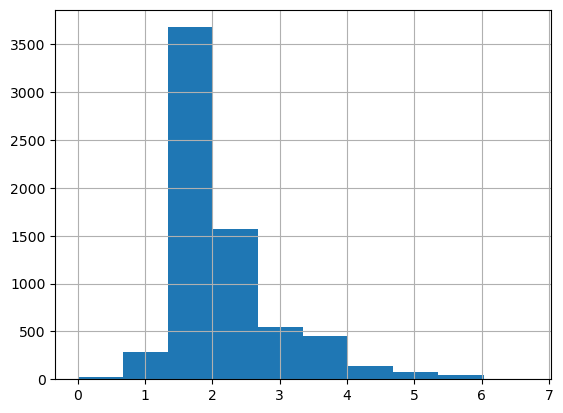

In [80]:
data['capacity'].hist()

## Kinda acceptable 

## Type of Fuel 

In [81]:
data['fuel'].unique()

array(['Gas', 'Dies', nan, 'Hybrid', 'other', 'Natural Gas'], dtype=object)

In [82]:
data['fuel'].value_counts()

fuel
Gas            3176
Dies           1260
Hybrid         1244
other           297
Natural Gas     155
Name: count, dtype: int64

In [83]:
data['fuel'].isna().sum()

681

### filling the missing values of fuel using groupby comination between model and type and assign values to missing values of fuel 

In [84]:
def fill_missing_fuel(data):
   
    fuel_mapping = (
        data.dropna(subset=['fuel'])  
        .groupby(['VehicleModel', 'Type'])['fuel']
        .agg(lambda x: x.mode()[0] if not x.mode().empty else None)  
        .reset_index()
        .set_index(['VehicleModel', 'Type'])['fuel']
        .to_dict()
    )
    def get_fuel(row):
        if pd.isna(row['fuel']): 
            return fuel_mapping.get((row['VehicleModel'], row['Type']), row['fuel'])
        return row['fuel']

    data['fuel'] = data.apply(get_fuel, axis=1)
    return data

data = fill_missing_fuel(data)

In [85]:
data['fuel'].isna().sum()

66

## YEAR 

In [86]:
data['ManufacturingYear'].unique()

array([2017., 2009.,   nan, 2007., 3010., 1999., 2012., 2011., 2014.,
       2015., 2006., 2105., 2013., 2010., 2003., 2016., 1998., 2018.,
       2008., 2111., 2020., 2005., 2004., 1910., 1914., 3009., 2001.,
       2112., 1997., 1917., 1916., 1912., 2002., 2110., 2115., 2019.,
       3013., 1907., 2000., 3014., 3004., 1996., 1913., 1900., 1902.,
       2117., 2118., 1995., 2113., 3012., 1915., 1911., 2098., 1918.,
       2114., 3008., 3006., 2107., 2119., 1908., 1992., 2099., 2116.,
       1985., 1909., 3007., 2103., 1905., 1991., 1983., 3011., 2104.,
       3015., 1904., 1993., 1994., 1988., 3017., 1898., 1903., 3018.,
       2998., 3016., 1982., 2108., 2106., 3003., 1896., 2100., 1893.,
       1987., 2120., 1990., 2102., 3005., 2097., 1919., 2096., 2101.,
       2999., 1901., 3019., 1953., 3002., 1986., 3000., 2109., 1984.,
       1920., 2089., 2992., 3001., 1906., 2093., 1978., 2997., 1895.])

# notice that there are values like 3008 , 2103 2109 
 - for me i decide if the year is after 2024 i replace the first two digits with
   20
 - check if there values beyond 2024 and remove it 

In [87]:
data['ManufacturingYear'] = pd.to_numeric(data['ManufacturingYear'], errors='coerce')
new = data[data['ManufacturingYear'] > 2024]

new['ManufacturingYear'] = new['ManufacturingYear'].apply(
    lambda num: float('20' + str(int(num))[-2:])
)
data.loc[new.index, 'ManufacturingYear'] = new['ManufacturingYear']

In [88]:
data[data['ManufacturingYear'] > 2024]

,ID,Brand,VehicleModel,ManufacturingYear,Type,rating,color,Duty,fuel,CylinderCount,type of gear,capacity,Odometer,Air_bag,price,turbo
391,9452,Mitsubishi,Pajero io,2098.0,Jeep,5,Emerald Green,0,Gas,4,NaN,1.8,196000,2.0,9408,0
524,10096,Mercedes-benz,E 350,2099.0,Sedan,3,Jet Black,0,Gas,14,Manual,2.0,280000,6.0,10349,0
1120,17959,Bmw,525,2098.0,Sedan,2,Sand,0,Gas,16,Manual,2.5,178000,5.0,8781,0
1291,9784,Opel,Astra,2098.0,Goods Wagon,3,Emerald Green,0,Gas,14,R,1.6,150000,4.0,6899,0
2434,3582,Ford,Transit,2098.0,Microbus,3,Pearl White,0,Dies,4,Manual,2.5,2222222,2.0,9408,1
2508,16046,Mercedes-benz,E 320,2099.0,Sedan,0,NaN,0,Natural Gas,6,R,3.2,205000,6.0,6272,0
2753,2386,Volkswagen,Golf,2097.0,Hatchback,2,Sapphire Blue,0,Gas,4,NaN,1.8,0,0.0,3763,0
2799,9151,Mercedes-benz,200,2099.0,Sedan,0,Jet Black,0,Dies,4,Manual,2.0,315000,6.0,6586,1
3383,11511,Opel,Astra,2096.0,Sedan,1,NaN,0,other,4,NaN,2.0,0,2.0,2700,0
3554,1876,Opel,Vectra,2099.0,Sedan,1,NaN,0,Gas,4,Gear,1.6,266342,2.0,8154,0


In [89]:
data = data.drop(data[data['ManufacturingYear'] > 2024].index)

#### check for the  missing years 

In [90]:
data['ManufacturingYear'].isna().sum()

651

#### I tried several ways like :
 - KNN imputer
 - trying to fill the missing with random forest model
 - interpolation
#### all of those methods were useless and when tring the model it wasn't that different so finally i decided to fill it with mean rounded to intger 

In [91]:
data['ManufacturingYear'].fillna(round(data['ManufacturingYear'].mean()), inplace=True)

In [92]:
data['ManufacturingYear'].value_counts()

ManufacturingYear
2007.0    803
2012.0    680
2014.0    667
2013.0    613
2011.0    530
         ... 
1986.0      1
1982.0      1
1920.0      1
1978.0      1
1895.0      1
Name: count, Length: 65, dtype: int64

#### combine all steps in one function 

In [93]:
def fill_manufacturing_year(data):
    data['ManufacturingYear'] = pd.to_numeric(data['ManufacturingYear'], errors='coerce')
    new = data[data['ManufacturingYear'] > 2024]

   
    new['ManufacturingYear'] = new['ManufacturingYear'].apply(
        lambda num: float('20' + str(int(num))[-2:]))
    
    data.loc[new.index, 'ManufacturingYear'] = new['ManufacturingYear']

    data = data.drop(data[data['ManufacturingYear'] > 2024].index)
    data['ManufacturingYear'].fillna(round(data['ManufacturingYear'].mean()), inplace=True)
    
    return data


## Type  of gear 

In [94]:
data['type of gear'].unique()

array(['R', 'Auto', nan, 'Manual', 'Others', 'Gear'], dtype=object)

In [95]:
data['type of gear'].isna().sum()

670

In [96]:
def fill_missing_gear(data):
    
    gear_mapping = (
        data.dropna(subset=['type of gear'])  # Drop rows where 'type of gear' is missing
        .groupby(['VehicleModel'])['type of gear']
        .agg(lambda x: x.mode()[0] if not x.mode().empty else None)  # Get the most common 'type of gear'
        .reset_index()
        .set_index('VehicleModel')['type of gear']
        .to_dict())
    
    def get_gear(row):
        if pd.isna(row['type of gear']): 
            return gear_mapping.get(row['VehicleModel'], row['type of gear'])  # Use 'VehicleModel' to fill missing values
        return row['type of gear']

    data['type of gear'] = data.apply(get_gear, axis=1)
    return data

data = fill_missing_gear(data)

In [97]:
data['type of gear'].isna().sum()

60

## Cylinder count

In [98]:
data['CylinderCount'].value_counts()

CylinderCount
4     4147
6      941
14     508
8      247
16     104
5       48
3       28
18      26
2       13
12      12
1       10
15       6
10       4
11       2
7        2
9        1
13       1
Name: count, dtype: Int64

### fill the missing values with median 

In [99]:
def fill_missing_Cylinder(data):
    data['CylinderCount'].fillna(data['CylinderCount'].median(), inplace=True)
    return data
data = fill_missing_Cylinder(data)

## Air Bag

In [100]:
data['Air_bag'].isna().sum()

694

In [101]:
data['Air_bag'].value_counts()

Air_bag
4.0     1822
12.0    1808
0.0      749
8.0      530
6.0      444
2.0      338
10.0     260
5.0       33
1.0       32
7.0       30
9.0       19
11.0      16
3.0       11
14.0       7
13.0       2
Name: count, dtype: int64

## making a mapping between each car model and the most common number of air bags for this model 

In [102]:
def fill_missing_bags(data):
    # Create a mapping of the most common 'Air_bag' for each 'VehicleModel'
    bags_mapping = (
        data.dropna(subset=['Air_bag'])  
        .groupby(['VehicleModel'])['Air_bag']
        .agg(lambda x: x.mode()[0] if not x.mode().empty else None) 
        .reset_index()
        .set_index('VehicleModel')['Air_bag']
        .to_dict())
    
    def get_bags(row):
        if pd.isna(row['Air_bag']): 
            return bags_mapping.get(row['VehicleModel'], row['Air_bag']) 
        return row['Air_bag']

    data['Air_bag'] = data.apply(get_bags, axis=1)
    return data

data = fill_missing_bags(data)

In [103]:
data['Air_bag'].isna().sum()

60

In [104]:
data['Air_bag'].value_counts()

Air_bag
4.0     2071
12.0    2039
0.0      822
8.0      537
6.0      464
2.0      382
10.0     267
5.0       35
1.0       33
7.0       30
9.0       19
11.0      16
3.0       11
14.0       7
13.0       2
Name: count, dtype: int64

<Axes: >

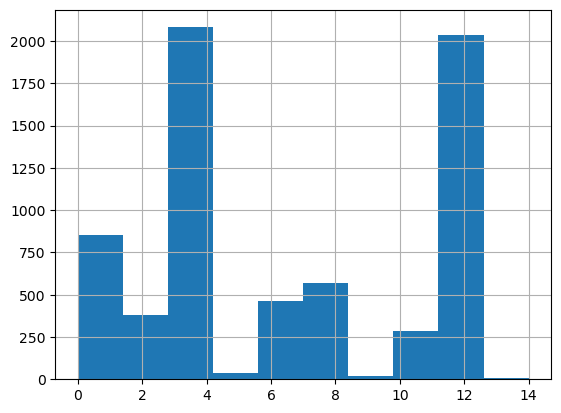

In [105]:
data['Air_bag'].hist()

# Rating 

In [106]:
data['rating'].unique()

<IntegerArray>
[0, 5, 4, <NA>, 2, 6, 3, 8, 1, 7, 9, 10]
Length: 12, dtype: Int64

In [107]:
def fill_missing_rating(data):
    data['rating'].fillna(round(data['rating'].mean()), inplace=True)
    return data
data = fill_missing_rating(data)

## COLOR 

In [108]:
data['color'].isna().sum()/len(data['color'])

0.3038999264164827

### about 30% of the data is missing in color so i decide to just drop it , but i will keep it now to make some analysis on the data 

### finally i will drop all the remainig missing values form the data 

In [109]:
data.isna().sum()

ID                      0
Brand                  45
VehicleModel            7
ManufacturingYear       0
Type                   52
rating                  0
color                2065
Duty                    0
fuel                   66
CylinderCount           0
type of gear           60
capacity                0
Odometer                0
Air_bag                60
price                   0
turbo                   0
dtype: int64

In [110]:
data = data.dropna(subset=[col for col in data.columns if col != 'color'])

In [111]:
data.isna().sum()

ID                      0
Brand                   0
VehicleModel            0
ManufacturingYear       0
Type                    0
rating                  0
color                1989
Duty                    0
fuel                    0
CylinderCount           0
type of gear            0
capacity                0
Odometer                0
Air_bag                 0
price                   0
turbo                   0
dtype: int64

In [112]:
data.shape

(6558, 16)

In [113]:
def missing_values(data):

    data = drop_important_missing(data)
    
    processing_functions = {
        'VehicleModel':fill_missing_vehicle_model ,
        'Brand':fill_missing_brand ,
        'Type':process_type,
        'ManufacturingYear':fill_manufacturing_year ,
        'fuel':fill_missing_fuel ,
        'rating': fill_missing_rating,
        'CylinderCount': fill_missing_Cylinder,
        'capacity':fill_missing_capacity,
        'type of gear':fill_missing_gear,
        'Air_bag': fill_missing_bags
    }

    for column, func in processing_functions.items():
        if column in data.columns:
            data = func(data)
    
    data = data.dropna(subset=[col for col in data.columns if col != 'color'])

    return data

# Drop ID and Color

In [114]:
data = data.drop(['ID'], axis=1)

In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6558 entries, 0 to 6999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              6558 non-null   object 
 1   VehicleModel       6558 non-null   object 
 2   ManufacturingYear  6558 non-null   float64
 3   Type               6558 non-null   object 
 4   rating             6558 non-null   Int64  
 5   color              4569 non-null   object 
 6   Duty               6558 non-null   int64  
 7   fuel               6558 non-null   object 
 8   CylinderCount      6558 non-null   Int64  
 9   type of gear       6558 non-null   object 
 10  capacity           6558 non-null   float64
 11  Odometer           6558 non-null   int64  
 12  Air_bag            6558 non-null   float64
 13  price              6558 non-null   int64  
 14  turbo              6558 non-null   int64  
dtypes: Int64(2), float64(3), int64(4), object(6)
memory usage: 832.6+ KB


## convert all integer data to int64

In [116]:
data = data.astype({
    'ManufacturingYear': 'int64',         
    'Air_bag': 'int64',      
    'CylinderCount': 'int64',
    'rating' : 'int64'})

<h1 style="color:darkred;">Some Feature Extraction</h1>

In [117]:
data['ManufacturingYear'].max()

2020

#### create feature calculate the age of the car and another to classify the rating into categorise 

In [118]:
data['CarAge'] = 2020 - data['ManufacturingYear']

#Create Rating Segmentation
def rating_segment(row):
    if row['rating'] in [1,2,3]:
        return 'Low'
    elif row['rating']in [4,5,6]:
        return 'Medium'
    elif row['rating'] in [7,8,9,10]:
        return 'High'

data['Rating_Segmentation'] = data.apply(rating_segment, axis=1)

In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6558 entries, 0 to 6999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                6558 non-null   object 
 1   VehicleModel         6558 non-null   object 
 2   ManufacturingYear    6558 non-null   int64  
 3   Type                 6558 non-null   object 
 4   rating               6558 non-null   int64  
 5   color                4569 non-null   object 
 6   Duty                 6558 non-null   int64  
 7   fuel                 6558 non-null   object 
 8   CylinderCount        6558 non-null   int64  
 9   type of gear         6558 non-null   object 
 10  capacity             6558 non-null   float64
 11  Odometer             6558 non-null   int64  
 12  Air_bag              6558 non-null   int64  
 13  price                6558 non-null   int64  
 14  turbo                6558 non-null   int64  
 15  CarAge               6558 non-null   int64 

### define numerical and categorcal 

In [120]:
numerical_columns = [
    'ManufacturingYear', 'rating', 'Duty', 
    'capacity', 'Odometer', 'price','CarAge']

## Despite knowing that Cylinder count are numerical but i will consider them as categorical as they only contain a few discrete values 
categorical_columns = [
    'Brand', 'VehicleModel', 'Type', 'color', 'fuel', 'type of gear', 'turbo', 'CylinderCount','Air_bag','Rating_Segmentation']

<h2 style="color:darkred;">Analyzing numerical data</h2>

# Outliers 

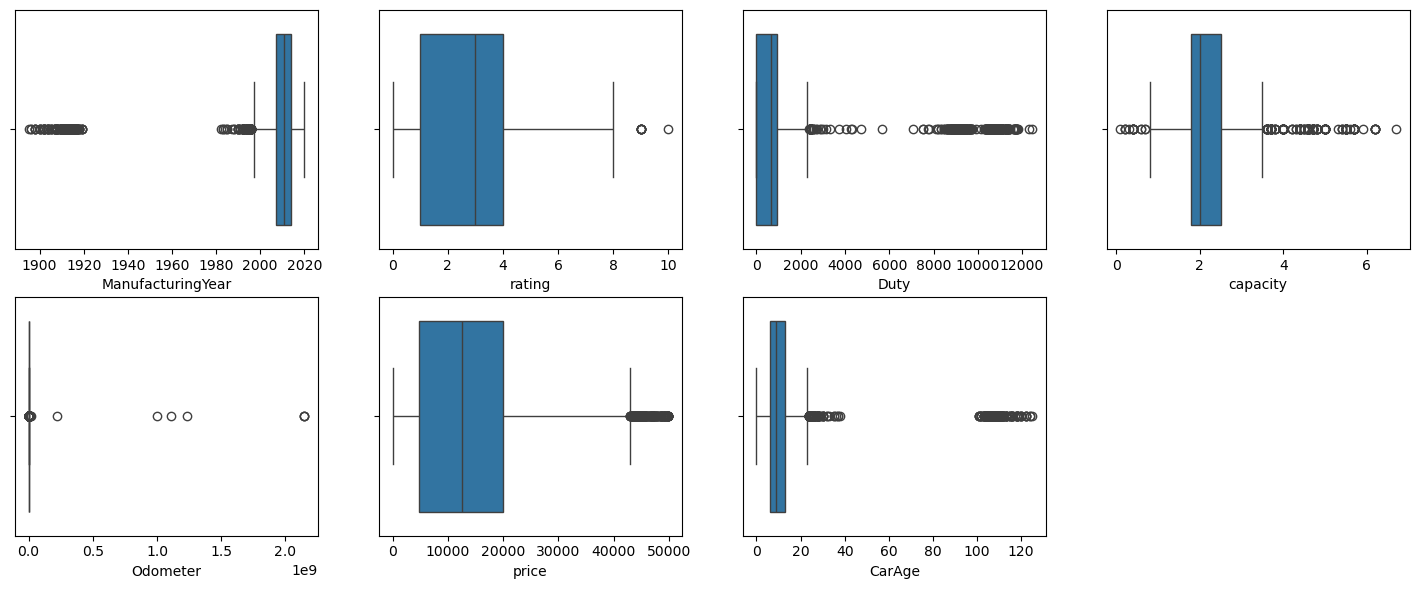

In [121]:
fig = plt.figure(figsize=(18,18))
c = 1
for col in numerical_columns :
    plt.subplot(5,4,c)
    g = sns.boxplot(x=col, data=data)
    c = c + 1

In [122]:
data.describe()

,ManufacturingYear,rating,Duty,CylinderCount,capacity,Odometer,Air_bag,price,turbo,CarAge
count,6558.000000,6558.000000,6558.000000,6558.000000,6558.000000,6.558000e+03,6558.000000,6558.000000,6558.000000,6558.000000
mean,2007.329216,2.667734,1176.284538,5.422080,2.242116,1.684882e+06,6.548490,14336.944648,0.077768,12.670784
std,18.214045,1.726318,2431.700789,3.122815,0.786149,5.184652e+07,4.294164,11743.912687,0.267826,18.214045
min,1895.000000,0.000000,0.000000,1.000000,0.100000,0.000000e+00,0.000000,3.000000,0.000000,0.000000
25%,2007.000000,1.000000,0.000000,4.000000,1.800000,7.495175e+04,4.000000,4861.000000,0.000000,6.000000
50%,2011.000000,3.000000,639.000000,4.000000,2.000000,1.290000e+05,5.000000,12544.000000,0.000000,9.000000
75%,2014.000000,4.000000,934.000000,6.000000,2.500000,1.903000e+05,12.000000,20071.000000,0.000000,13.000000
max,2020.000000,10.000000,12455.000000,18.000000,6.700000,2.147484e+09,14.000000,49889.000000,1.000000,125.000000


## you can notice there is outliers in 
 - year
 - duty
 - capacity
 - odometer 
#### we should remove them or handle them in some method 

In [123]:
outlier_cols = ['Odometer','Duty']
for col_name in outlier_cols:

    q1 = data[col_name].quantile(0.25)
    q3 = data[col_name].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    data[col_name] = data[col_name].clip(lower_bound, upper_bound)

In [124]:
outlier_cols = ['ManufacturingYear','CarAge']
for col_name in outlier_cols:
    q1 =data[col_name].quantile(0.25)
    q3 = data[col_name].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    median_value = 2007
    data[col_name] = data[col_name].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)

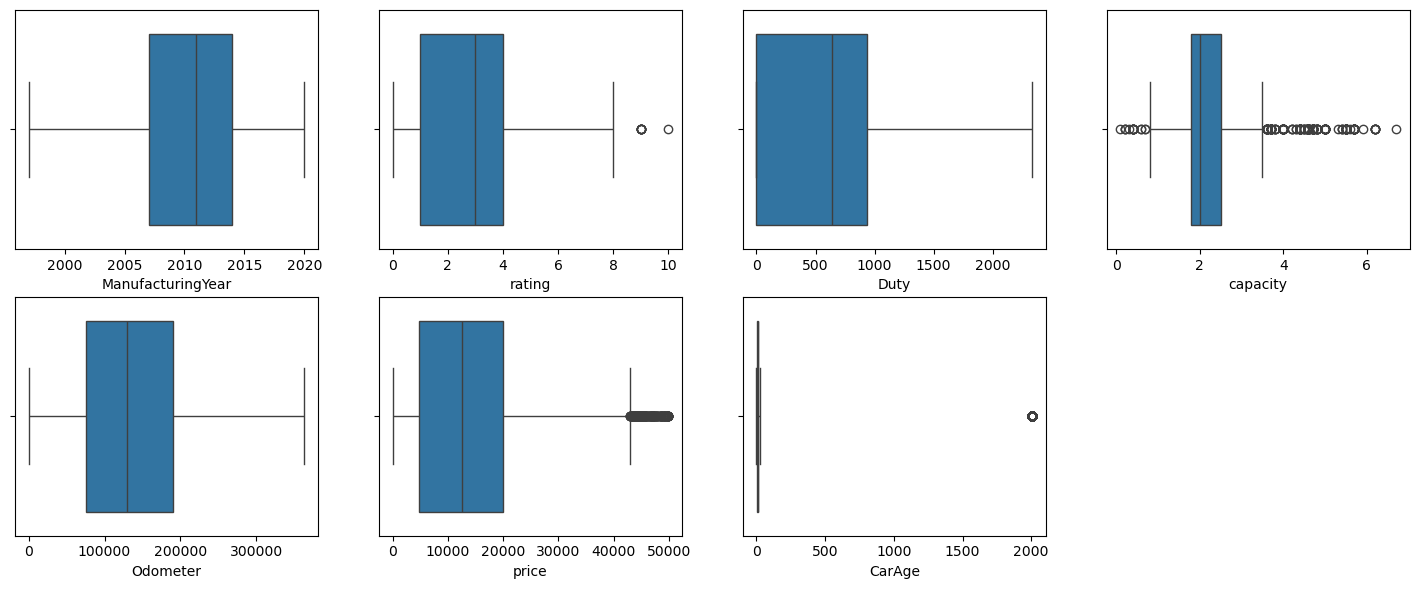

In [125]:
fig = plt.figure(figsize=(18,18))
c = 1
for col in numerical_columns :
    plt.subplot(5,4,c)
    g = sns.boxplot(x=col, data=data)
    c = c + 1

In [126]:
data = data[data['CarAge'] <= 200]

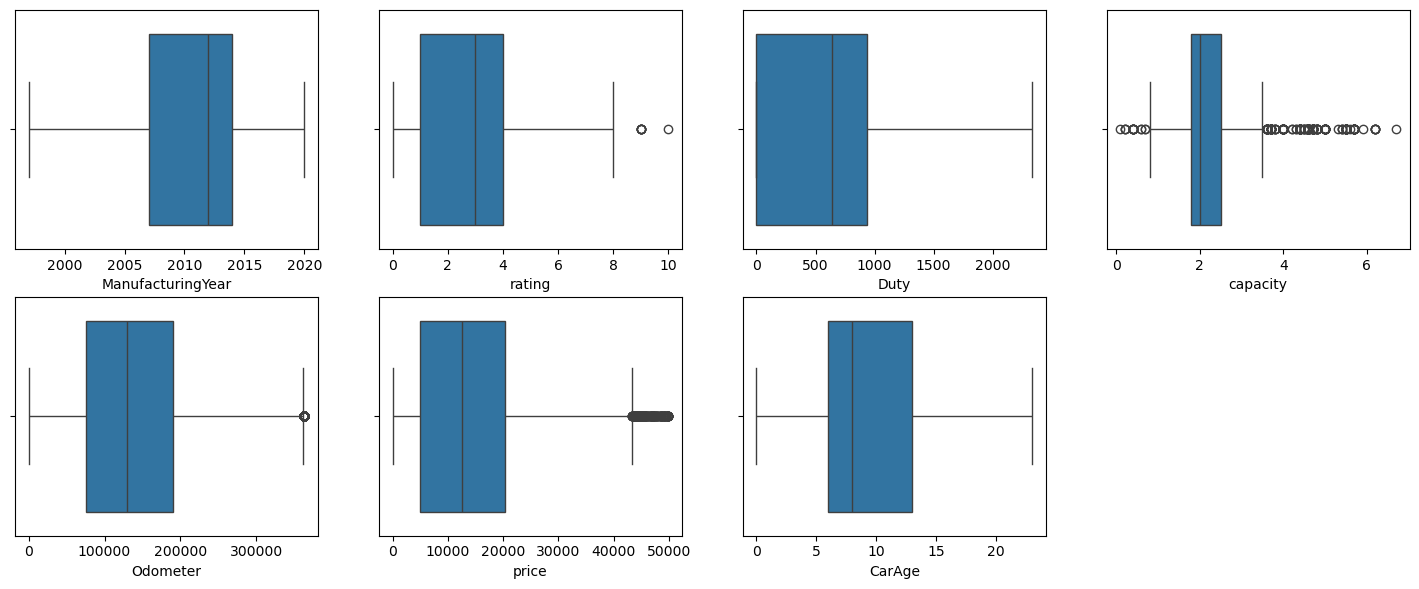

In [127]:
fig = plt.figure(figsize=(18,18))
c = 1
for col in numerical_columns :
    plt.subplot(5,4,c)
    g = sns.boxplot(x=col, data=data)
    c = c + 1

### notice most of the outliers have been eliminated 

## SKewness 

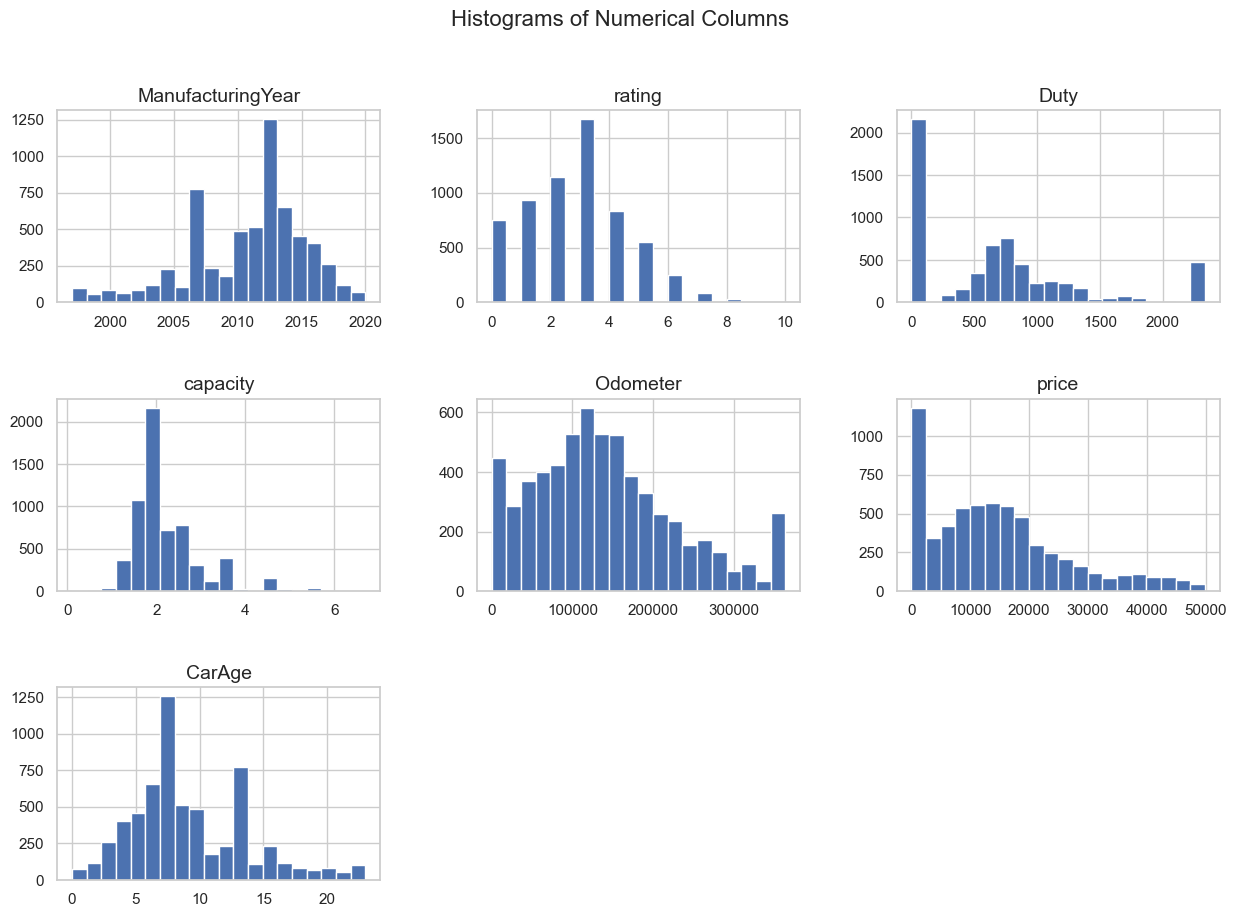

In [128]:
sns.set(style="whitegrid")

data[numerical_columns].hist(bins=20, figsize=(15, 10))

plt.suptitle('Histograms of Numerical Columns', fontsize=16)
plt.subplots_adjust(hspace=0.5)

for ax in plt.gcf().axes:
    ax.set_xlabel(ax.get_xlabel(), fontsize=12)
    ax.set_ylabel(ax.get_ylabel(), fontsize=12)
    ax.set_title(ax.get_title(), fontsize=14)

plt.show()

#### there is skewness in duty manufactruning year  
#### so we should transform those data to get rid of this skewness 

<h1 style="color:darkred;">some caterorical feature analysis</h1> 

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_top(data, column):
    top_categories = data[column].value_counts().head(20)
    plt.figure(figsize=(10, 6))
    sns.set(style="whitegrid")  

    
    sns.countplot(data=data, x=column, order=top_categories.index, palette='viridis')

    plt.title(f"Top 20 Category Distribution in {column}", fontsize=16, weight='bold', color='darkblue')
    plt.xlabel(column, fontsize=12, weight='bold', color='darkgreen')
    plt.ylabel('Frequency', fontsize=12, weight='bold', color='darkgreen')
    plt.xticks(rotation=90, fontsize=10, weight='bold', color='darkred')
    

    plt.grid(axis='y', linestyle='--', alpha=0.7)
    for p in plt.gca().patches:
        plt.gca().annotate(f'{p.get_height()}', 
                           (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha='center', va='center', 
                           fontsize=10, weight='bold', color='black', 
                           xytext=(0, 8), textcoords='offset points')

    plt.tight_layout()  
    plt.show()

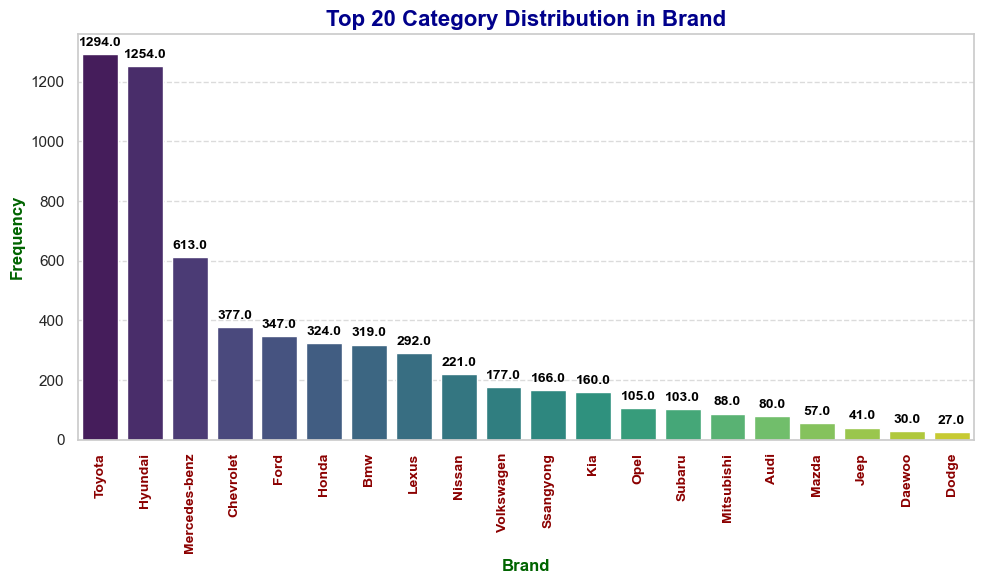

In [130]:
plot_top(data, 'Brand')

### you can see that Toyota and hyundai take almost have of the data and i see imbalancing in this features as there are some brands is showing minority so we should handle it using one methods of over sampling 

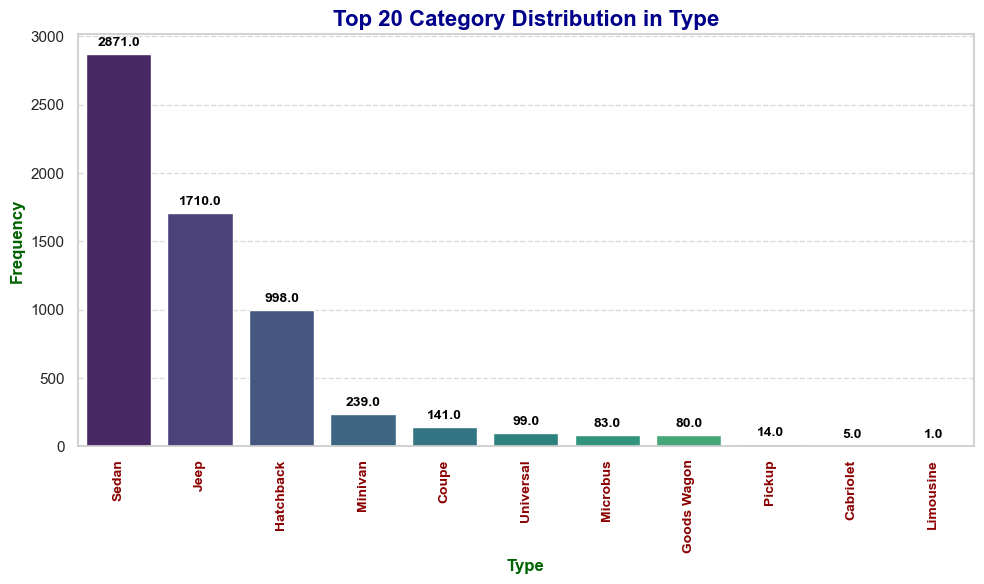

In [131]:
plot_top(data, 'Type')

#### pickup , cabriolet and lumosine are minority so we should handling this imbalancing 

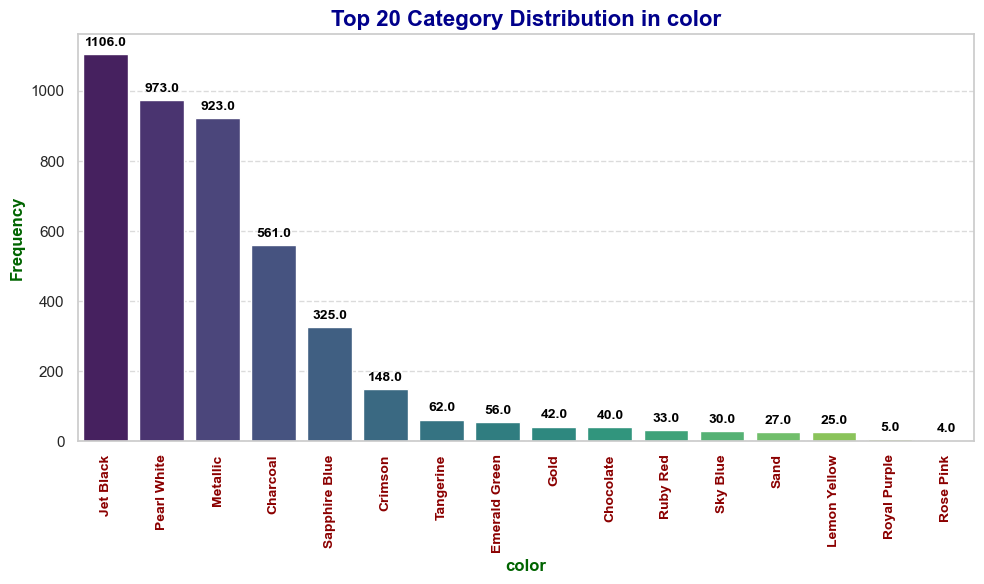

In [132]:
plot_top(data, 'color')

In [133]:
def plot_boxplot(data, categorical_column, numerical_column):
    plt.figure(figsize=(10, 6))
    sns.set(style="whitegrid")

    sns.boxplot(x=categorical_column, y=numerical_column, data=data, palette='viridis')
    plt.title(f"Boxplot of {numerical_column} by {categorical_column}", fontsize=16, weight='bold', color='darkblue')
    plt.xlabel(categorical_column, fontsize=12, weight='bold', color='darkgreen')
    plt.ylabel(numerical_column, fontsize=12, weight='bold', color='darkgreen')

    plt.xticks(rotation=45, fontsize=10, weight='bold', color='darkred')
    plt.tight_layout()
    plt.show()

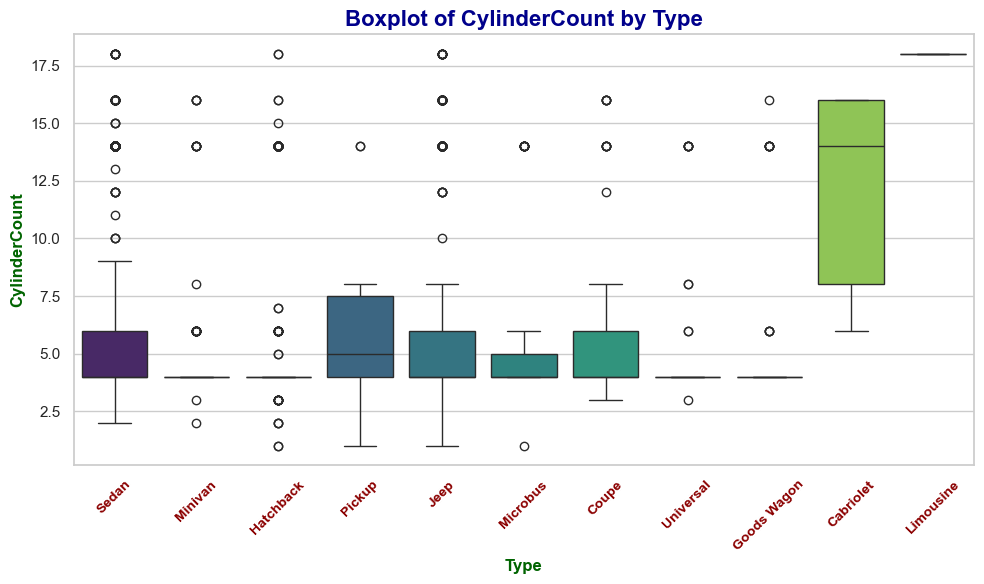

In [134]:
 plot_boxplot(data, 'Type', 'CylinderCount')

#### it shows that limo and cabroilet have the most cylinder 

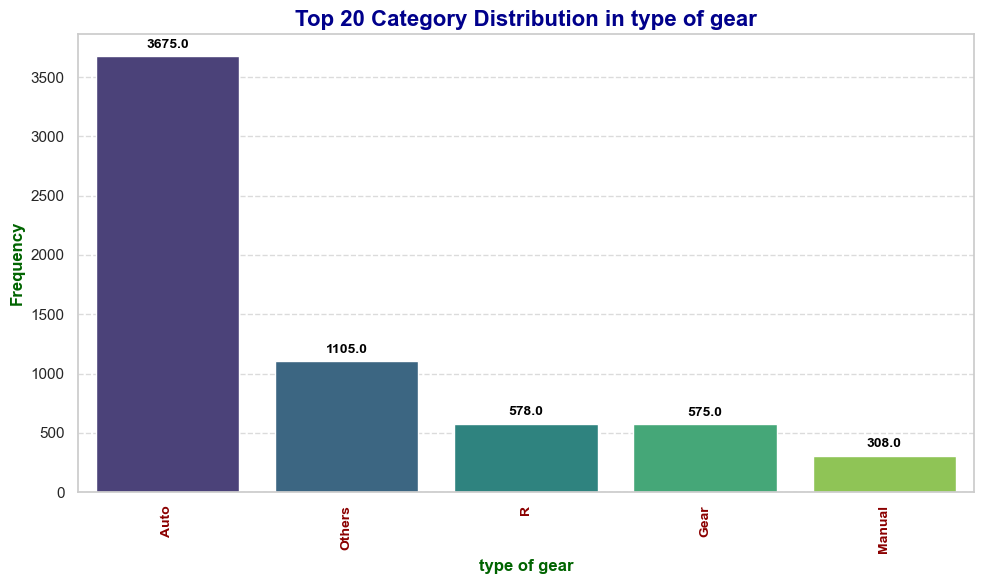

In [135]:
plot_top(data, 'type of gear')

## most expensive model for each car 

In [136]:
most_expensive = data.loc[data.groupby('Brand')['price'].idxmax()]

In [137]:
most_expensive[['Brand', 'VehicleModel', 'price']]

,Brand,VehicleModel,price
4458,Acura,Tlx,10349
1608,Alfa romeo,159,12544
1973,Audi,Q5,47042
2625,Bmw,528,49864
6135,Buick,Encore,31361
832,Cadillac,Cts,12544
3833,Chevrolet,Captiva,49174
1981,Chrysler,200,3607
5624,Citroen,Berlingo,7840
5228,Daewoo,Lacetti,11563


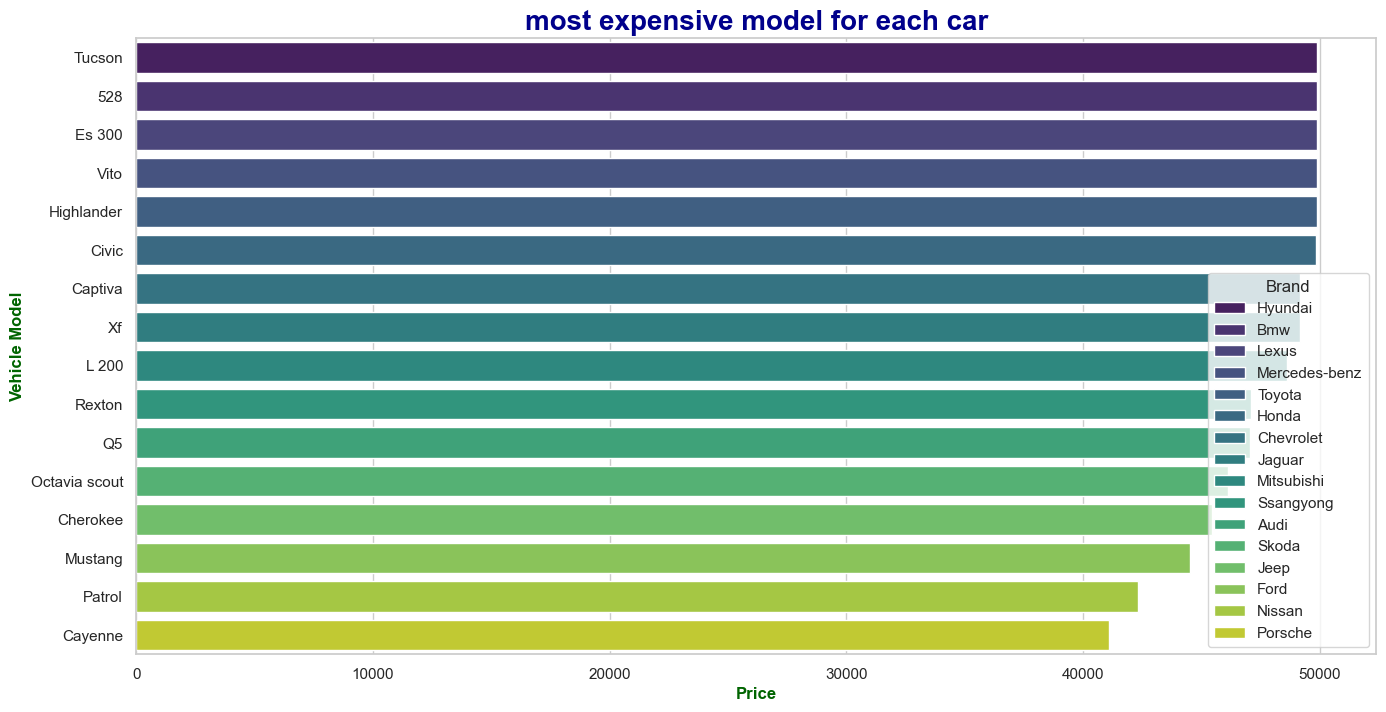

In [138]:

most_expensive_top_20 = most_expensive.nlargest(16, 'price')

    # Create a barplot to visualize the most expensive models (top 20)
plt.figure(figsize=(16, 8))
sns.barplot(x='price', y='VehicleModel', hue='Brand', data=most_expensive_top_20, palette='viridis')

    # Add titles and labels
plt.title('most expensive model for each car', fontsize=20, weight='bold', color='darkblue')
plt.xlabel('Price', fontsize=12, weight='bold', color='darkgreen')
plt.ylabel('Vehicle Model', fontsize=12, weight='bold', color='darkgreen')

#     # Display the plot
# plt.tight_layout()
plt.show()


### average price per brand 

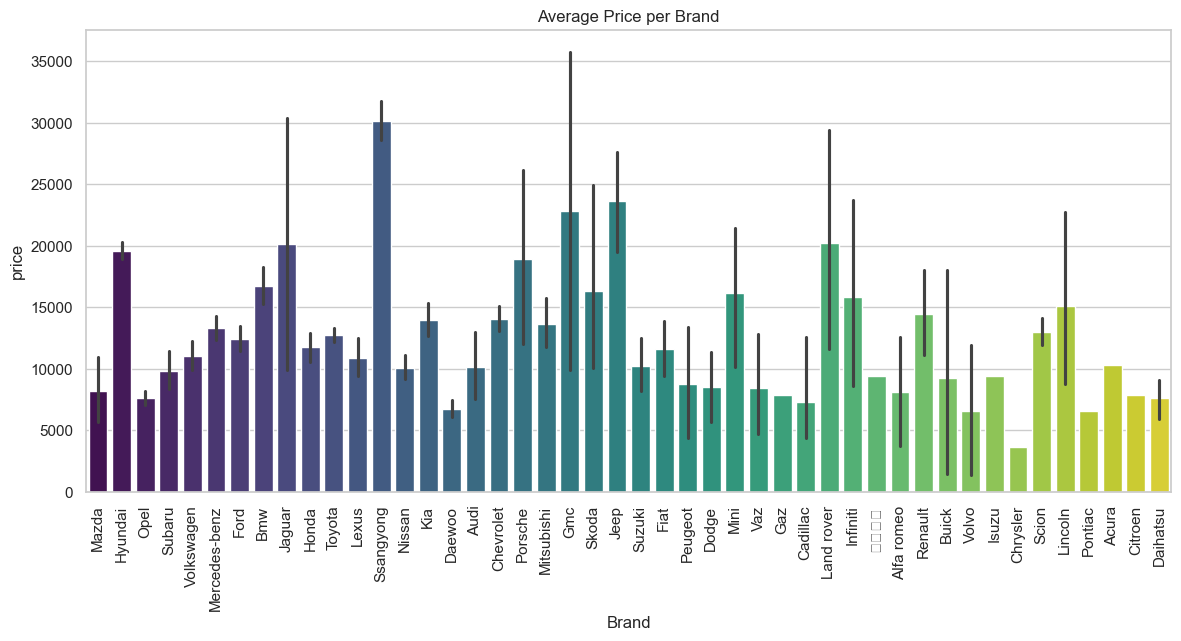

In [139]:
plt.figure(figsize=(14, 6))
sns.barplot(data=data, x='Brand', y='price', estimator='mean', palette='viridis')
plt.title("Average Price per Brand")
plt.xticks(rotation=90)
plt.show()

## Rating segmantaion 

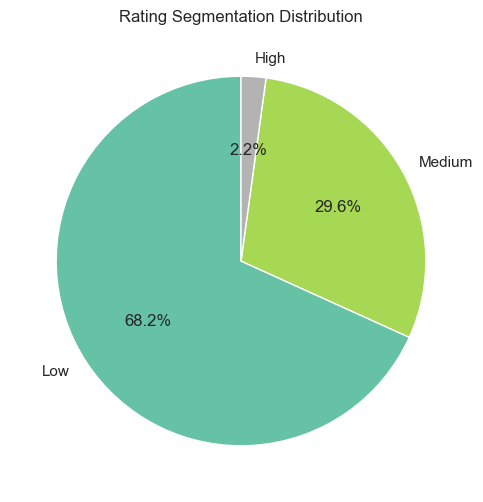

In [140]:
rating_counts = data['Rating_Segmentation'].value_counts()
plt.figure(figsize=(6, 6))
rating_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set2')
plt.title("Rating Segmentation Distribution")
plt.ylabel('')
plt.show()

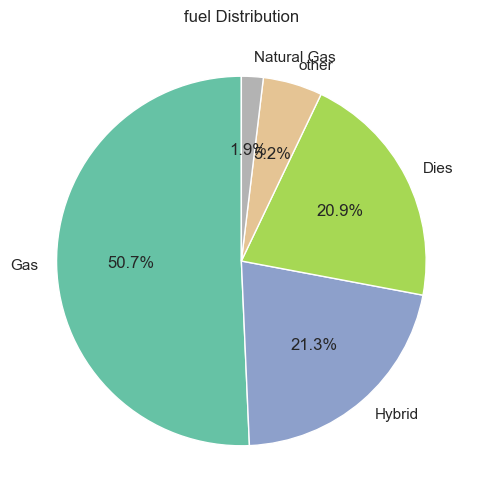

In [141]:
rating_counts = data['fuel'].value_counts()
plt.figure(figsize=(6, 6))
rating_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set2')
plt.title("fuel Distribution")
plt.ylabel('')
plt.show()

In [142]:
num_col = [
    'ManufacturingYear', 'rating', 'Duty', 'CylinderCount', 'capacity', 'Odometer', 'Air_bag', 'price', 'CarAge'
]

<h1 style="color:darkred;">correlation matrix</h1>

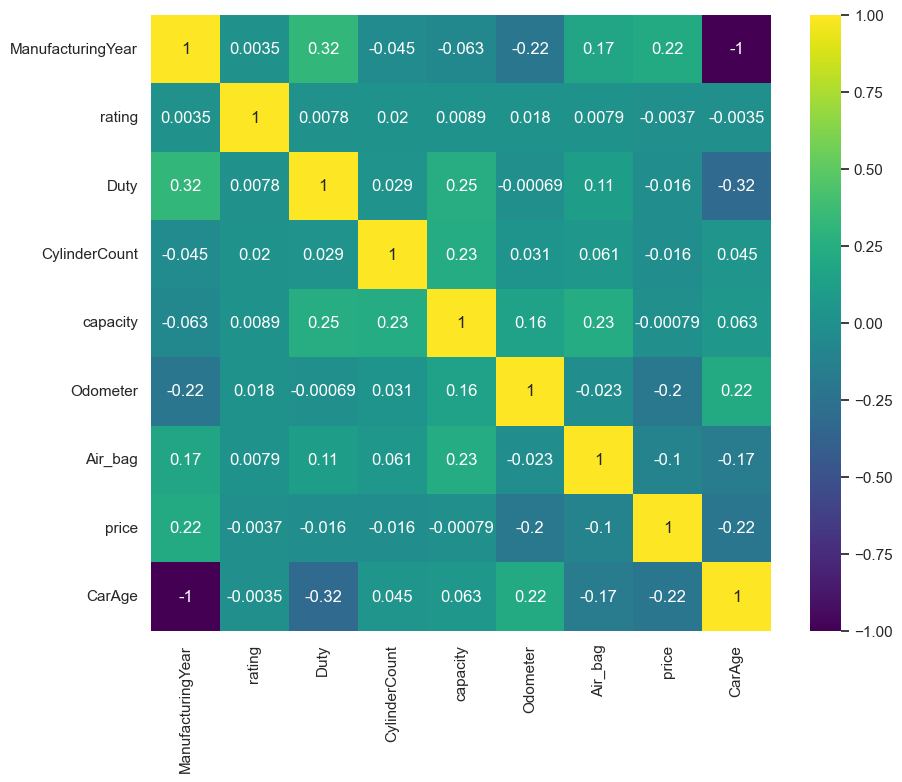

In [143]:
plt.figure(figsize=(10, 8))
sns.heatmap(data[num_col].corr(), cmap='viridis', annot=True)
plt.show()

<h1 style="color:darkred;">correlation between features and target </h1>

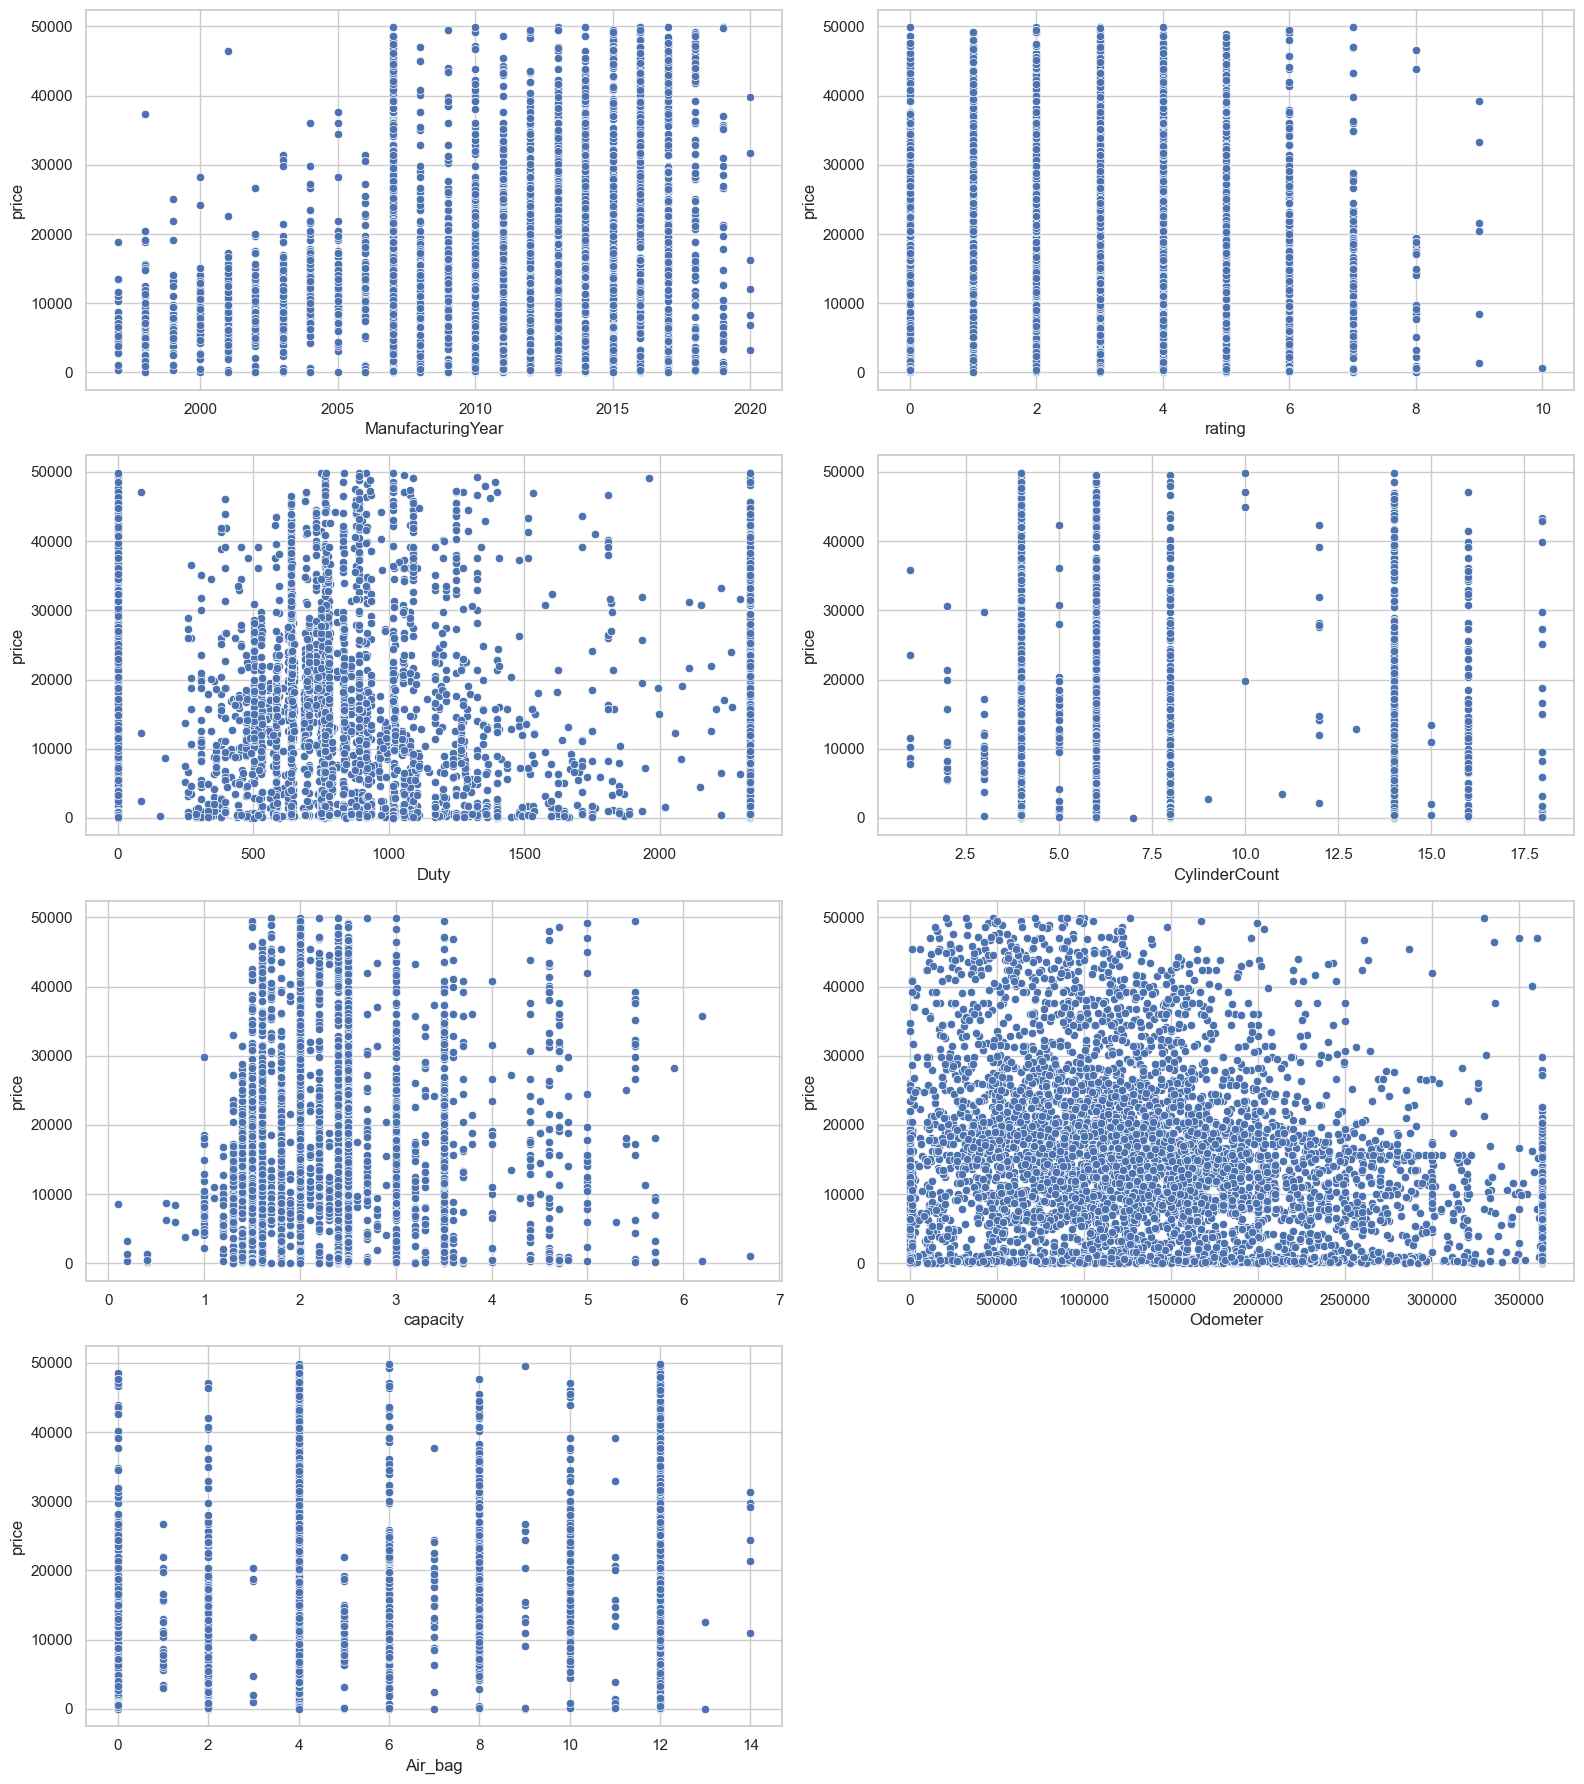

In [144]:
fig, axes = plt.subplots(4, 2, figsize=(16, 18))

# Scatter plot for various features
sns.scatterplot(data=data, y='price', x='ManufacturingYear', ax=axes[0, 0])
sns.scatterplot(data=data, y='price', x='rating', ax=axes[0, 1])
sns.scatterplot(data=data, y='price', x='Duty', ax=axes[1, 0])
sns.scatterplot(data=data, y='price', x='CylinderCount', ax=axes[1, 1])
sns.scatterplot(data=data, y='price', x='capacity', ax=axes[2, 0])
sns.scatterplot(data=data, y='price', x='Odometer', ax=axes[2, 1])
sns.scatterplot(data=data, y='price', x='Air_bag', ax=axes[3, 0])

axes[3, 1].axis('off')

# Display the plot
plt.tight_layout()
plt.show()

#### the correlations are very weak and that's kinda werid 

<h1 style="color:darkred;">Handle skewness</h1>

## use quntile transformer for manufaturing year 

In [145]:
from sklearn.preprocessing import QuantileTransformer
from scipy.stats import skew
import pandas as pd

# Initialize the QuantileTransformer
quantile_transformer = QuantileTransformer(output_distribution='normal', random_state=42)

# Apply transformation to the specified columns and assign back to the DataFrame
data[['ManufacturingYear', 'CarAge']] = quantile_transformer.fit_transform(data[['ManufacturingYear', 'CarAge']])

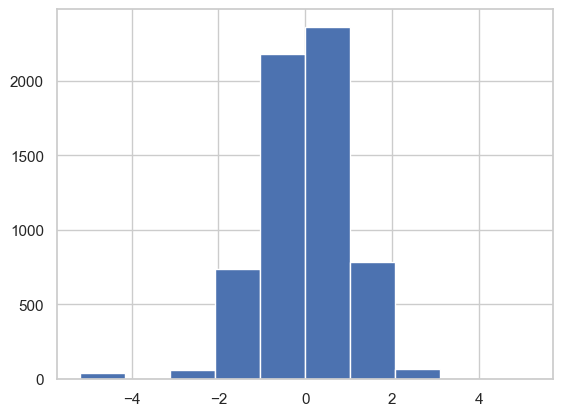

In [146]:
data['ManufacturingYear'].hist()
plt.show()

<h1 style="color:darkred;">Feature improvment</h1>

In [147]:
data = data.drop(['color'], axis=1)

In [148]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

### encooding the object data 

In [149]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
le = LabelEncoder()
cat_cols = train_data.select_dtypes(include = 'object').columns
for cols in cat_cols:
    train_data[cols] = le.fit_transform(train_data[cols])

#### as mentioned previously there was imbalancing in the brand column so we would do over sampling to balance the data 

In [150]:
from imblearn.over_sampling import RandomOverSampler

X = train_data.drop('Brand', axis=1)
y = train_data['Brand']

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

train_data = pd.DataFrame(X_resampled, columns=X.columns)
train_data['Brand'] = y_resampled

cols = ['Brand'] + [col for col in train_data.columns if col != 'Brand']
train_data = train_data[cols]

In [151]:
train_data

,Brand,VehicleModel,ManufacturingYear,Type,rating,Duty,fuel,CylinderCount,type of gear,capacity,Odometer,Air_bag,price,turbo,CarAge,Rating_Segmentation
0,2,55,-1.597698,9,3,0,1,6,2,3.0,265600.0,8,8781,0,1.597698,1
1,6,159,0.092972,9,2,586,1,4,2,1.8,216000.0,6,12544,0,-0.092972,1
2,26,183,-0.143512,9,4,1172,0,6,0,3.5,132630.0,12,314,0,0.143512,2
3,12,443,0.636387,2,3,777,1,4,0,2.5,200968.0,4,9408,0,-0.636387,1
4,3,20,0.636387,9,5,639,1,4,3,2.0,181659.0,12,282,0,-0.636387,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45580,44,252,-0.855287,4,0,0,1,4,3,2.3,102000.0,2,9408,0,0.855287,3
45581,44,252,-0.855287,4,0,0,1,4,3,2.3,102000.0,2,9408,0,0.855287,3
45582,44,252,-0.855287,4,0,0,1,4,3,2.3,102000.0,2,9408,0,0.855287,3
45583,44,252,-0.855287,4,0,0,1,4,3,2.3,102000.0,2,9408,0,0.855287,3


<Axes: >

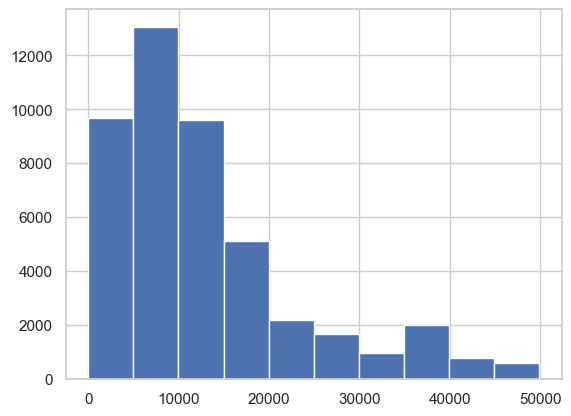

In [152]:
train_data['price'].hist()

In [153]:
x_train =  train_data.drop(columns=['price'])
y_train = train_data['price']

### scaling the data 

In [154]:
scaler = StandardScaler()
cols_to_scale = x_train.drop(columns='turbo').columns
x_train[cols_to_scale] = scaler.fit_transform(x_train[cols_to_scale])

<h1 style="color:darkred;">modeling</h1>

In [155]:
!pip install xgboost

In [156]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import make_pipeline

<h1 style="color:darkred;">Fitting and evaluation on the train</h1>

In [157]:
models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'Extra Trees Regressor': ExtraTreesRegressor(random_state=42),
    'GradientBoost Regressor': GradientBoostingRegressor(random_state=42),
    'XGB Regressor': XGBRegressor(random_state=42),
    'Linear Regression': LinearRegression()
}

results = []


for model_name, model in models.items():

    model.fit(x_train, y_train)
    y_pred = model.predict(x_train)
    
    rmse = mean_squared_error(y_train, y_pred, squared=False)
    r2 = r2_score(y_train, y_pred)
    
    results.append({'Model': model_name, 'RMSE': rmse, 'R2 Score': r2})


results_df = pd.DataFrame(results)
results_df

,Model,RMSE,R2 Score
0,Random Forest,699.726619,0.995562
1,Extra Trees Regressor,89.078555,0.999928
2,GradientBoost Regressor,5698.271335,0.705650
3,XGB Regressor,2151.108610,0.958053
4,Linear Regression,9145.890544,0.241720


<h1 style="color:darkred;">cross validation</h1>

In [158]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, r2_score

def rmse_scorer(y_true, y_pred):
    return mean_squared_error(y_true, y_pred, squared=False)


rmse_score = make_scorer(rmse_scorer, greater_is_better=False)


models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'Extra Trees Regressor': ExtraTreesRegressor(random_state=42),
    'GradientBoost Regressor': GradientBoostingRegressor(random_state=42),
    'XGB Regressor': XGBRegressor(random_state=42),
    'Linear Regression': LinearRegression()
}
results = []


for model_name, model in models.items():
    
    cv_rmse = cross_val_score(model, x_train, y_train, cv=5, scoring=rmse_score)
    mean_rmse = - np.mean(cv_rmse)  
    cv_r2 = cross_val_score(model, x_train, y_train, cv=5, scoring='r2')
    mean_r2 = np.mean(cv_r2)
    
    
    results.append({'Model': model_name, 'Mean RMSE': mean_rmse, 'Mean R2 Score': mean_r2})


results_df_cv = pd.DataFrame(results)
results_df_cv

,Model,Mean RMSE,Mean R2 Score
0,Random Forest,3969.798668,0.800796
1,Extra Trees Regressor,1540.739253,0.907839
2,GradientBoost Regressor,7772.345700,0.305534
3,XGB Regressor,5015.776262,0.691671
4,Linear Regression,9878.382165,-0.094041


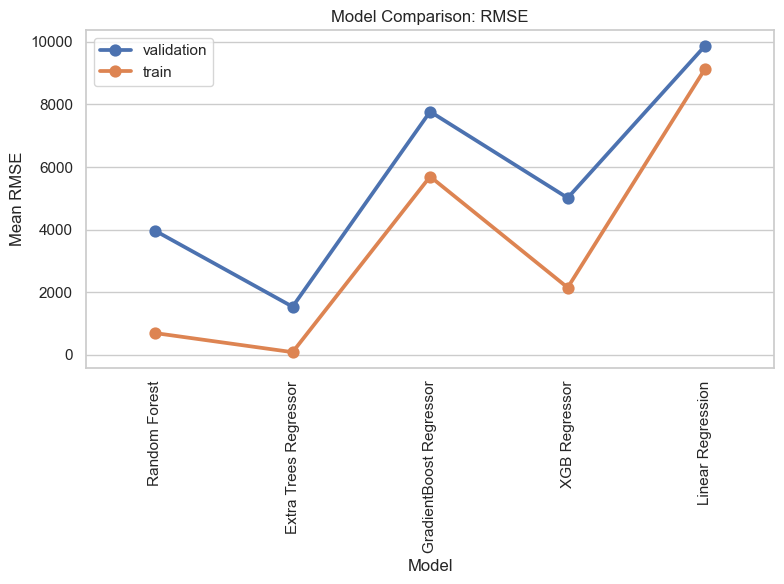

In [159]:
plt.figure(figsize=(8,6))
sns.pointplot(x='Model',y='Mean RMSE',data=results_df_cv,label="validation")
sns.pointplot(x='Model',y='RMSE',data=results_df,label="train")
plt.xticks(rotation=90)
plt.title('Model Comparison: RMSE')
plt.legend()
plt.tight_layout()
plt.style.use('bmh')


plt.show()

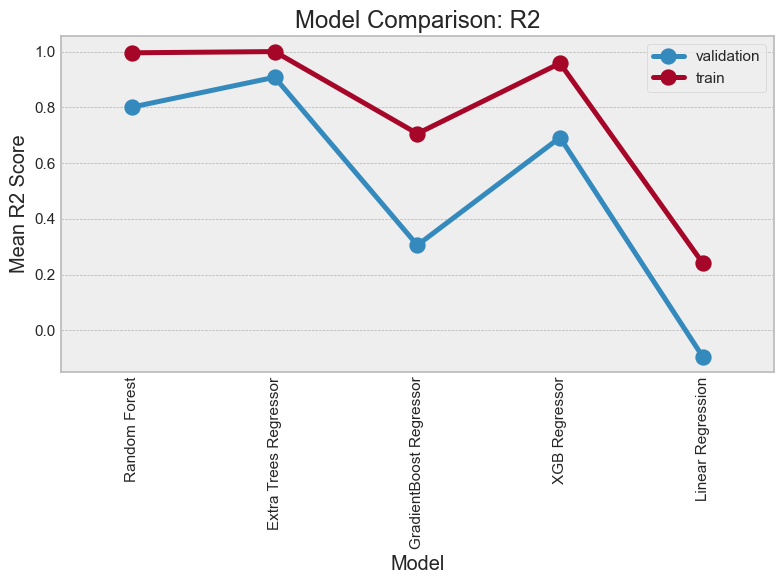

In [160]:
plt.figure(figsize=(8,6))
sns.pointplot(x='Model',y='Mean R2 Score',data=results_df_cv,label="validation")
sns.pointplot(x='Model',y='R2 Score',data=results_df,label="train")
plt.xticks(rotation=90)
plt.title('Model Comparison: R2')
plt.legend()
plt.tight_layout()

plt.show()

### it seems that ExtraTreeRegresor is the best model on both validation and  train

In [161]:
the_model = ExtraTreesRegressor(random_state=42)
the_model.fit(x_train, y_train)

ExtraTreesRegressor(random_state=42)

In [162]:
numerical_features = data.select_dtypes(include=['number']).columns.tolist()
categorical_features = data.select_dtypes(include=['object']).columns.tolist()
numerical_features = ['ManufacturingYear','rating','Duty','CylinderCount','capacity','Odometer',
 'Air_bag',
 'price']
categorical_features = ['Brand',
 'VehicleModel',
 'Type',
 'fuel',
 'type of gear']

<h1 style="color:darkred;">making pipeline to directly transform the data</h1>

In [163]:
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler, LabelEncoder, PowerTransformer
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import FunctionTransformer

def handle_outliers_1(data):
    outlier_cols = ['Odometer', 'Duty']  # Define the columns to handle outliers
    for col_name in outlier_cols:
        q1 = data[col_name].quantile(0.25)
        q3 = data[col_name].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        data[col_name] = data[col_name].clip(lower_bound, upper_bound)
    return data
# outlier_transformer_1 = FunctionTransformer(handle_outliers_1)


def handle_outliers_2(data):
    outlier_cols = ['ManufacturingYear']
    for col_name in outlier_cols:
        q1 =data[col_name].quantile(0.25)
        q3 = data[col_name].quantile(0.75)
        iqr = q3 - q1
    
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
    
        median_value = 2007
        data[col_name] = data[col_name].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)
        return data 
# outlier_transformer_2 = FunctionTransformer(handle_outliers_2)

# Extraction = FunctionTransformer(extract_data)
# fill_missing = FunctionTransformer(missing_values)

def label_encode_and_scale(X):
    X_encoded = X.copy()
    for col in X_encoded.columns:
        X_encoded[col] = LabelEncoder().fit_transform(X_encoded[col])
    return StandardScaler().fit_transform(X_encoded)

# categorical_preprocessor = FunctionTransformer(label_encode_and_scale)

quantile_transformer = QuantileTransformer(output_distribution='normal', random_state=42)
# skewness_preprocessor = ColumnTransformer(
#     transformers=[
#         ('quantile',quantile_transformer ,['ManufacturingYear'])
#     ],
#     remainder='passthrough'
# )

# numerical_preprocessor = Pipeline(steps=[
#     ('Extract_data',Extraction),
#     ('fillna', fill_missing), 
#     ('outlier_handling_1', outlier_transformer_1),   
#     ('outlier_handling_2', outlier_transformer_2),   
#     ('skewness_handling', skewness_preprocessor),
#     ('scaling', StandardScaler())                                 
                   
# ])

# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numerical_preprocessor, numerical_features),
#         ('cat', categorical_preprocessor, categorical_features)
#     ]
# )


<h1 style="color:darkred;">data for prediction</h1>

In [164]:
pred = pd.read_csv("test.csv")

In [165]:
pred= pred.rename(columns={'#airbags': 'Air_bag'})

In [166]:
pred = extract_data(pred)

In [167]:
pred = missing_values(pred)
pred

,ID,Brand,VehicleModel,ManufacturingYear,Type,rating,color,Duty,fuel,CylinderCount,type of gear,capacity,Odometer,Air_bag,turbo
0,5634,Mercedes-benz,E 300,2007.0,Sedan,4,Jet Black,1017,Gas,4,Auto,2.0,1600,12.0,0
1,16689,Honda,Civic hybrid,2012.0,Sedan,1,Sky Blue,0,Hybrid,4,Auto,1.5,141302,12.0,0
2,13457,Bmw,M3,2006.0,Hatchback,1,NaN,0,Dies,4,Manual,1.9,136000,6.0,1
3,4555,Hyundai,Elantra,2016.0,Sedan,3,NaN,2188,Gas,4,Gear,1.8,78000,10.0,0
4,9726,Mercedes-benz,E 300,2007.0,Sedan,8,NaN,1017,Gas,4,R,2.0,1600,12.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,14959,Mercedes-benz,E 320,2001.0,Sedan,1,Jet Black,0,Gas,6,Auto,3.2,2000,8.0,0
2996,10125,Nissan,X-trail,2005.0,Jeep,2,Gold,0,Gas,4,Auto,2.4,180000,8.0,0
2997,9275,Ford,Transit,2011.0,Microbus,4,NaN,0,Gas,4,R,1.3,148000,8.0,0
2998,1812,Volkswagen,Jetta,2017.0,Sedan,3,Pearl White,0,Gas,14,Auto,1.4,50000,4.0,1


In [168]:
pred['CarAge'] = 2020 - pred['ManufacturingYear']

def rating_segment(row):
    if row['rating'] in [1,2,3]:
        return 'Low'
    elif row['rating']in [4,5,6]:
        return 'Medium'
    elif row['rating'] in [7,8,9,10]:
        return 'High'

pred['Rating_Segmentation'] = pred.apply(rating_segment, axis=1)

In [169]:
pred 

,ID,Brand,VehicleModel,ManufacturingYear,Type,rating,color,Duty,fuel,CylinderCount,type of gear,capacity,Odometer,Air_bag,turbo,CarAge,Rating_Segmentation
0,5634,Mercedes-benz,E 300,2007.0,Sedan,4,Jet Black,1017,Gas,4,Auto,2.0,1600,12.0,0,13.0,Medium
1,16689,Honda,Civic hybrid,2012.0,Sedan,1,Sky Blue,0,Hybrid,4,Auto,1.5,141302,12.0,0,8.0,Low
2,13457,Bmw,M3,2006.0,Hatchback,1,NaN,0,Dies,4,Manual,1.9,136000,6.0,1,14.0,Low
3,4555,Hyundai,Elantra,2016.0,Sedan,3,NaN,2188,Gas,4,Gear,1.8,78000,10.0,0,4.0,Low
4,9726,Mercedes-benz,E 300,2007.0,Sedan,8,NaN,1017,Gas,4,R,2.0,1600,12.0,0,13.0,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,14959,Mercedes-benz,E 320,2001.0,Sedan,1,Jet Black,0,Gas,6,Auto,3.2,2000,8.0,0,19.0,Low
2996,10125,Nissan,X-trail,2005.0,Jeep,2,Gold,0,Gas,4,Auto,2.4,180000,8.0,0,15.0,Low
2997,9275,Ford,Transit,2011.0,Microbus,4,NaN,0,Gas,4,R,1.3,148000,8.0,0,9.0,Medium
2998,1812,Volkswagen,Jetta,2017.0,Sedan,3,Pearl White,0,Gas,14,Auto,1.4,50000,4.0,1,3.0,Low


In [170]:
pred = handle_outliers_1(pred)
pred = handle_outliers_2(pred)
pred['ManufacturingYear'] = quantile_transformer.fit_transform(pred[['ManufacturingYear']])

In [171]:
le = LabelEncoder()
cat_cols = pred.select_dtypes(include = 'object').columns
for cols in cat_cols:
    pred[cols] = le.fit_transform(pred[cols])

In [172]:
scaler = StandardScaler()
cols_to_scale =pred.drop(columns=['turbo','ID']).columns
pred[cols_to_scale] = scaler.fit_transform(pred[cols_to_scale])

In [173]:
pred

,ID,Brand,VehicleModel,ManufacturingYear,Type,rating,color,Duty,fuel,CylinderCount,type of gear,capacity,Odometer,Air_bag,turbo,CarAge,Rating_Segmentation
0,5634,0.198876,-0.622028,-0.761525,0.960790,0.776348,-0.784982,0.459186,-0.213920,-0.441533,-0.758228,-0.291058,-1.501285,1.256648,0,0.019693,0.758143
1,16689,-0.724211,-1.019914,0.167011,0.960790,-0.982189,0.912801,-0.969549,0.825001,-0.441533,-0.758228,-0.917146,-0.005622,1.256648,0,-0.257556,-0.626628
2,13457,-1.647297,0.316573,-1.103551,-1.175310,-0.982189,1.290087,-0.969549,-1.252841,-0.441533,0.604353,-0.416276,-0.062385,-0.124461,1,0.075143,-0.626628
3,4555,-0.556377,-0.581220,1.208424,0.960790,0.190169,1.290087,2.104269,-0.213920,-0.441533,-0.076937,-0.541493,-0.683339,0.796278,0,-0.479356,-0.626628
4,9726,0.198876,-0.622028,-0.761525,0.960790,3.121063,1.290087,0.459186,-0.213920,-0.441533,1.966934,-0.291058,-1.501285,1.256648,0,0.019693,-2.011398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,14959,0.198876,-0.611826,-1.578018,0.960790,-0.982189,-0.784982,-0.969549,-0.213920,0.198792,-0.758228,1.211552,-1.497003,0.335908,0,0.352392,-0.626628
2996,10125,0.450627,1.602049,-1.175859,-0.819293,-0.396010,-0.973625,-0.969549,-0.213920,-0.441533,-0.758228,0.209812,0.408683,0.335908,0,0.130593,-0.626628
2997,9275,-1.059878,1.336792,-0.049297,-0.107260,0.776348,1.290087,-0.969549,-0.213920,-0.441533,1.966934,-1.167581,0.066088,0.335908,0,-0.202107,0.758143
2998,1812,1.541547,0.122732,1.564842,0.960790,0.190169,-0.219054,-0.969549,-0.213920,2.760090,-0.758228,-1.042363,-0.983110,-0.584831,1,-0.534806,-0.626628


In [174]:
ID = pred['ID']

In [175]:
pred = pred.drop(columns = ['ID','color'])

In [176]:
pred

,Brand,VehicleModel,ManufacturingYear,Type,rating,Duty,fuel,CylinderCount,type of gear,capacity,Odometer,Air_bag,turbo,CarAge,Rating_Segmentation
0,0.198876,-0.622028,-0.761525,0.960790,0.776348,0.459186,-0.213920,-0.441533,-0.758228,-0.291058,-1.501285,1.256648,0,0.019693,0.758143
1,-0.724211,-1.019914,0.167011,0.960790,-0.982189,-0.969549,0.825001,-0.441533,-0.758228,-0.917146,-0.005622,1.256648,0,-0.257556,-0.626628
2,-1.647297,0.316573,-1.103551,-1.175310,-0.982189,-0.969549,-1.252841,-0.441533,0.604353,-0.416276,-0.062385,-0.124461,1,0.075143,-0.626628
3,-0.556377,-0.581220,1.208424,0.960790,0.190169,2.104269,-0.213920,-0.441533,-0.076937,-0.541493,-0.683339,0.796278,0,-0.479356,-0.626628
4,0.198876,-0.622028,-0.761525,0.960790,3.121063,0.459186,-0.213920,-0.441533,1.966934,-0.291058,-1.501285,1.256648,0,0.019693,-2.011398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.198876,-0.611826,-1.578018,0.960790,-0.982189,-0.969549,-0.213920,0.198792,-0.758228,1.211552,-1.497003,0.335908,0,0.352392,-0.626628
2996,0.450627,1.602049,-1.175859,-0.819293,-0.396010,-0.969549,-0.213920,-0.441533,-0.758228,0.209812,0.408683,0.335908,0,0.130593,-0.626628
2997,-1.059878,1.336792,-0.049297,-0.107260,0.776348,-0.969549,-0.213920,-0.441533,1.966934,-1.167581,0.066088,0.335908,0,-0.202107,0.758143
2998,1.541547,0.122732,1.564842,0.960790,0.190169,-0.969549,-0.213920,2.760090,-0.758228,-1.042363,-0.983110,-0.584831,1,-0.534806,-0.626628


In [177]:
prediction = the_model.predict(pred)

In [178]:
results = pd.DataFrame({
     'ID'  : ID,
    'Prediction': prediction
})

In [179]:
results.to_csv('predictions_with_index.csv', index=False)